In [199]:
pip install numpy pandas matplotlib scikit-learn xgboost lightgbm > null

848346.56s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
import matplotlib.dates as mdates
import torch.nn.functional as F



## XGBoost

Fold 1 - Test Mean Absolute Error: 0.7674
Fold 1 - Test Mean Squared Error: 0.9978


Fold 2 - Test Mean Absolute Error: 1.7200
Fold 2 - Test Mean Squared Error: 6.4406


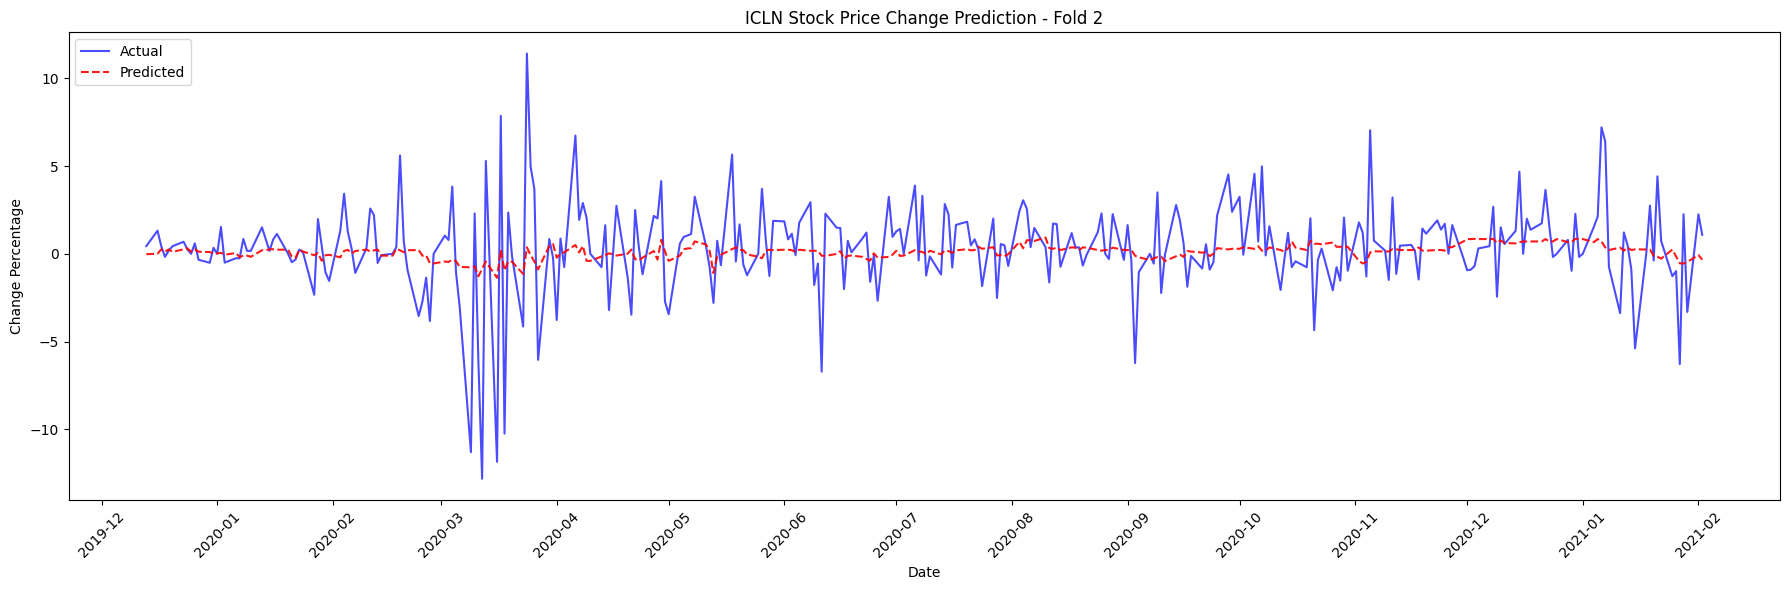

Fold 3 - Test Mean Absolute Error: 1.5184
Fold 3 - Test Mean Squared Error: 4.2289


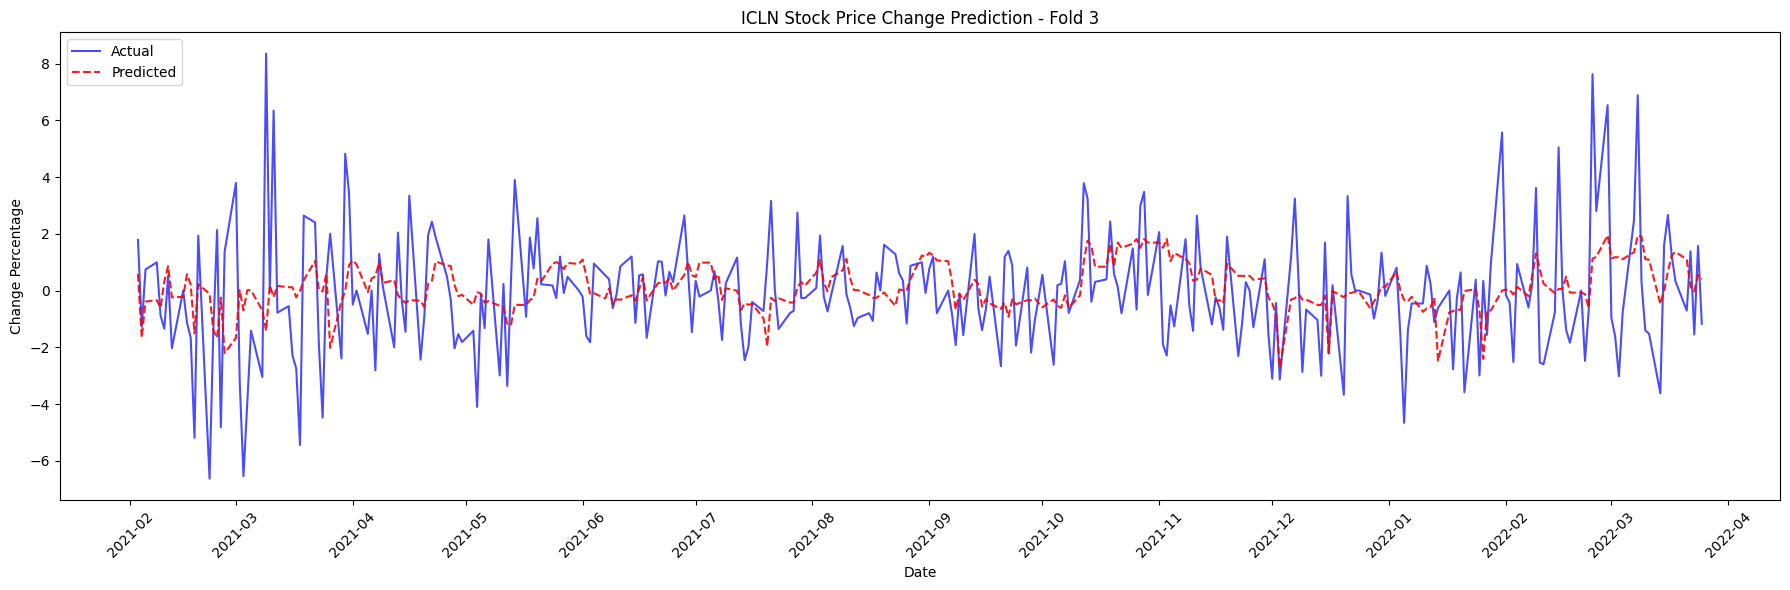

Fold 4 - Test Mean Absolute Error: 1.5162
Fold 4 - Test Mean Squared Error: 4.1111


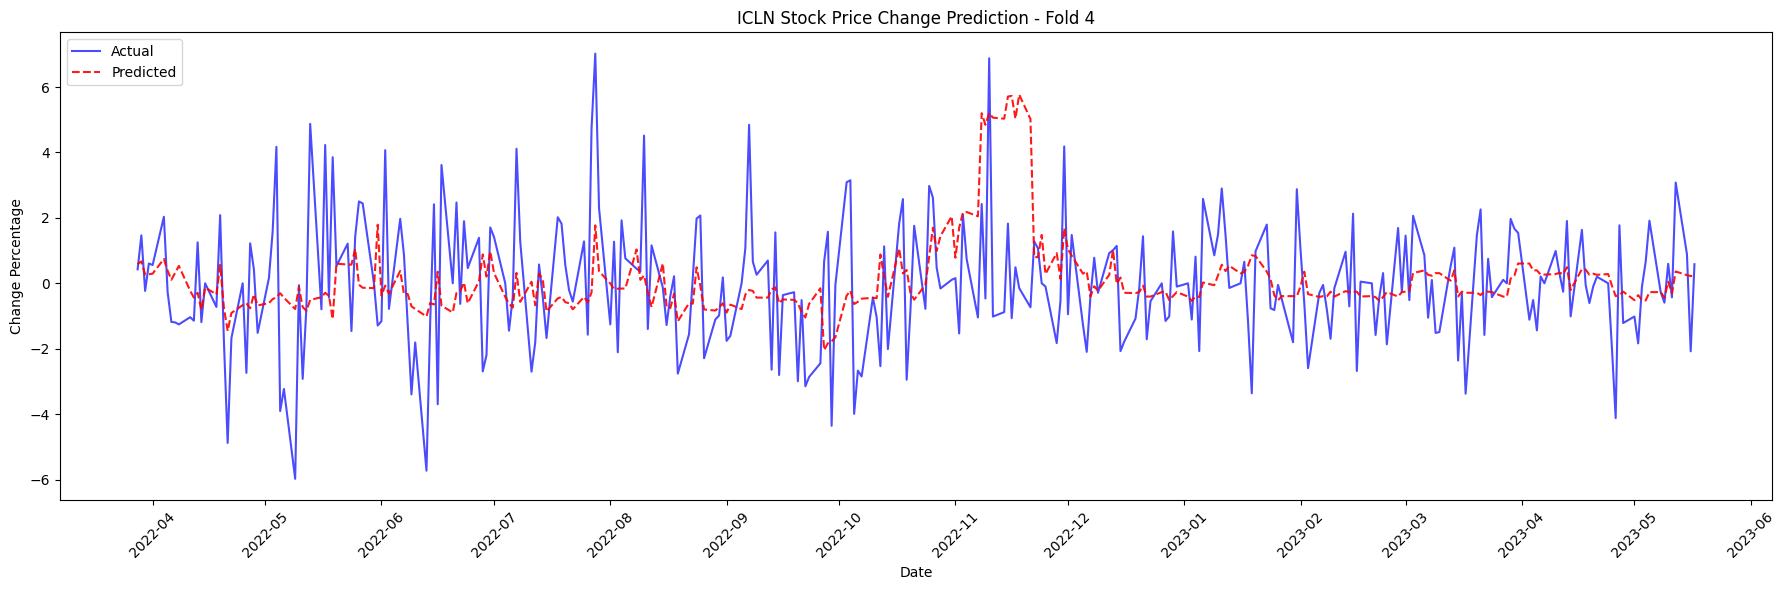

Fold 5 - Test Mean Absolute Error: 1.1674
Fold 5 - Test Mean Squared Error: 2.3137


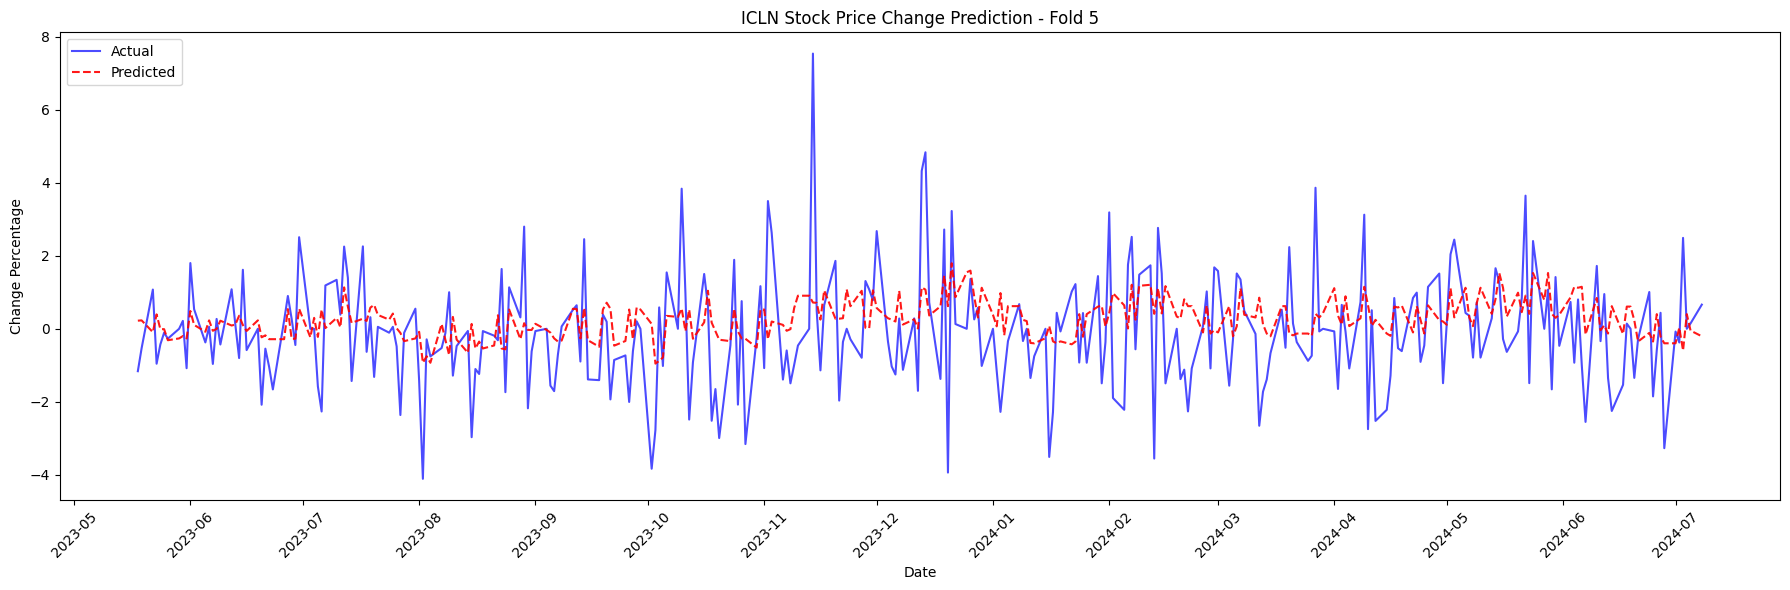

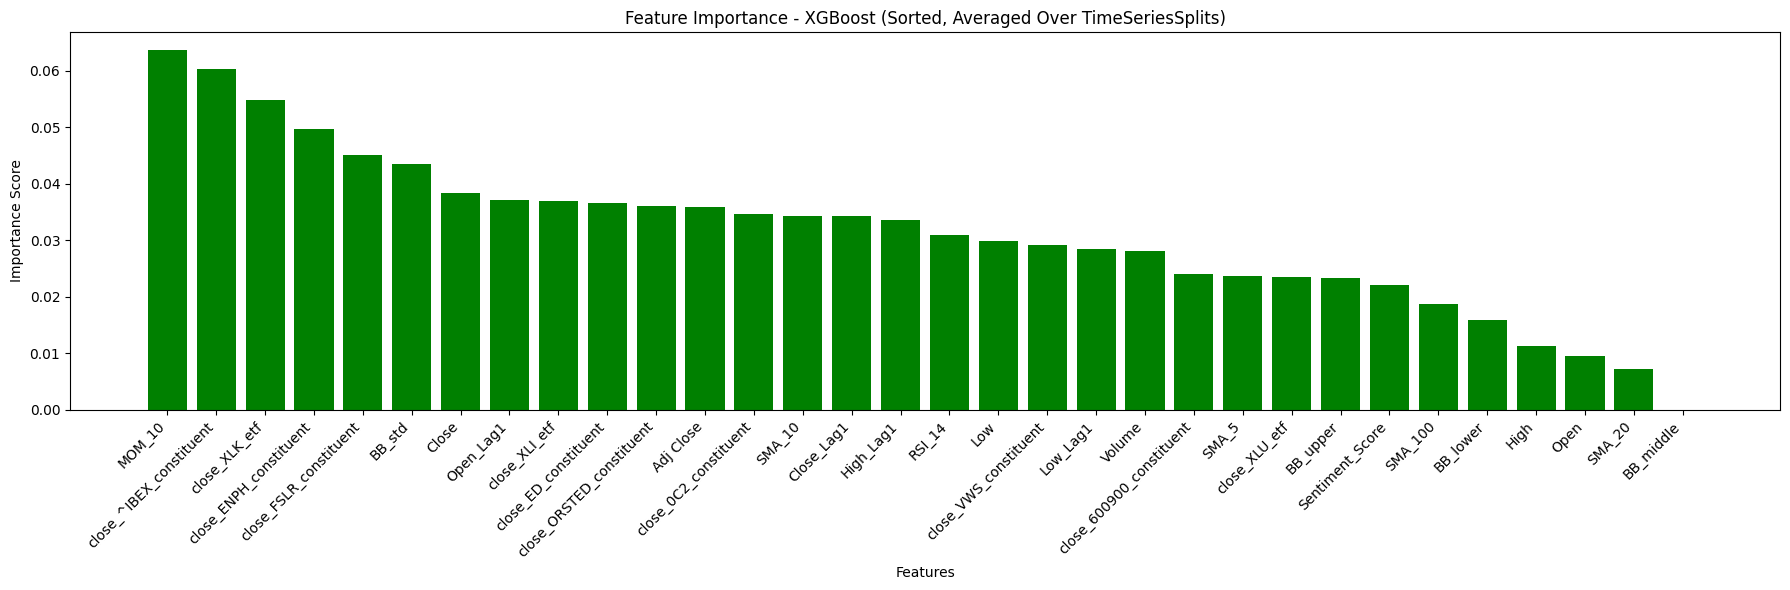

In [21]:
# Load and Prepare Data
df = pd.read_csv('ICLN_data_with_sentiment.csv', index_col='Date')
df['Close_Percentage_Change'] = df['Close'].pct_change() * 100
df.dropna(inplace=True)

# Extract features and target
features = df.drop('Close_Percentage_Change', axis=1).values
target = df['Close_Percentage_Change'].values

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

feature_importances_list = []
fold = 0

# Loop through the splits
for train_index, test_index in tscv.split(features):
    fold += 1
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = target[train_index], target[test_index]

    # Scaling within the fold
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train XGBoost Model
    xgb_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.05,
        max_depth=3
    )

    # Fit the model
    xgb_model.fit(X_train_scaled, y_train)

    # Predictions
    test_predictions = xgb_model.predict(X_test_scaled)

    # Evaluation
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    print(f'Fold {fold} - Test Mean Absolute Error: {test_mae:.4f}')
    print(f'Fold {fold} - Test Mean Squared Error: {test_mse:.4f}')

    # Store feature importances for this fold
    feature_importances_list.append(xgb_model.feature_importances_)

    # Plot predictions for this fold
    plt.figure(figsize=(18, 6))
    test_dates = pd.to_datetime(df.index[test_index])
    plt.plot(test_dates, y_test, label='Actual', color='blue', alpha=0.7)
    plt.plot(test_dates, test_predictions, label='Predicted', color='red', linestyle='--', alpha=0.9)

    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.title(f'ICLN Stock Price Change Prediction - Fold {fold}')
    plt.xlabel('Date')
    plt.ylabel('Change Percentage')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

# Calculate the average feature importance over all folds
average_importance = np.mean(feature_importances_list, axis=0)

# Sort feature importances
feature_cols = df.drop('Close_Percentage_Change', axis=1).columns.tolist()
importance_sorted_indices = np.argsort(average_importance)[::-1]
feature_cols_sorted = [feature_cols[i] for i in importance_sorted_indices]
importance_sorted = average_importance[importance_sorted_indices]

# Plot Sorted Feature Importance
plt.figure(figsize=(18, 6))
plt.bar(feature_cols_sorted, importance_sorted, color='green')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance - XGBoost (Sorted, Averaged Over TimeSeriesSplits)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## LSTM

/opt/miniconda3/envs/fintech_env/lib/python3.12/site-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Fold 1, Epoch [10/100], Loss: 0.2703, Val Loss: 0.3162
Fold 1, Epoch [20/100], Loss: 0.2665, Val Loss: 0.3189
Fold 1, Epoch [30/100], Loss: 0.2608, Val Loss: 0.3205
Fold 1, Epoch [40/100], Loss: 0.2515, Val Loss: 0.3110
Fold 1, Epoch [50/100], Loss: 0.2420, Val Loss: 0.3062
Fold 1, Epoch [60/100], Loss: 0.2359, Val Loss: 0.3084
Fold 1, Epoch [70/100], Loss: 0.2262, Val Loss: 0.3152
Fold 1, Epoch [80/100], Loss: 0.2138, Val Loss: 0.3191
Fold 1, Epoch [90/100], Loss: 0.2192, Val Loss: 0.3185
Fold 1, Epoch [100/100], Loss: 0.2131, Val Loss: 0.3359
Mean Absolute Error: 0.7900, Mean Squared Error: 1.0887


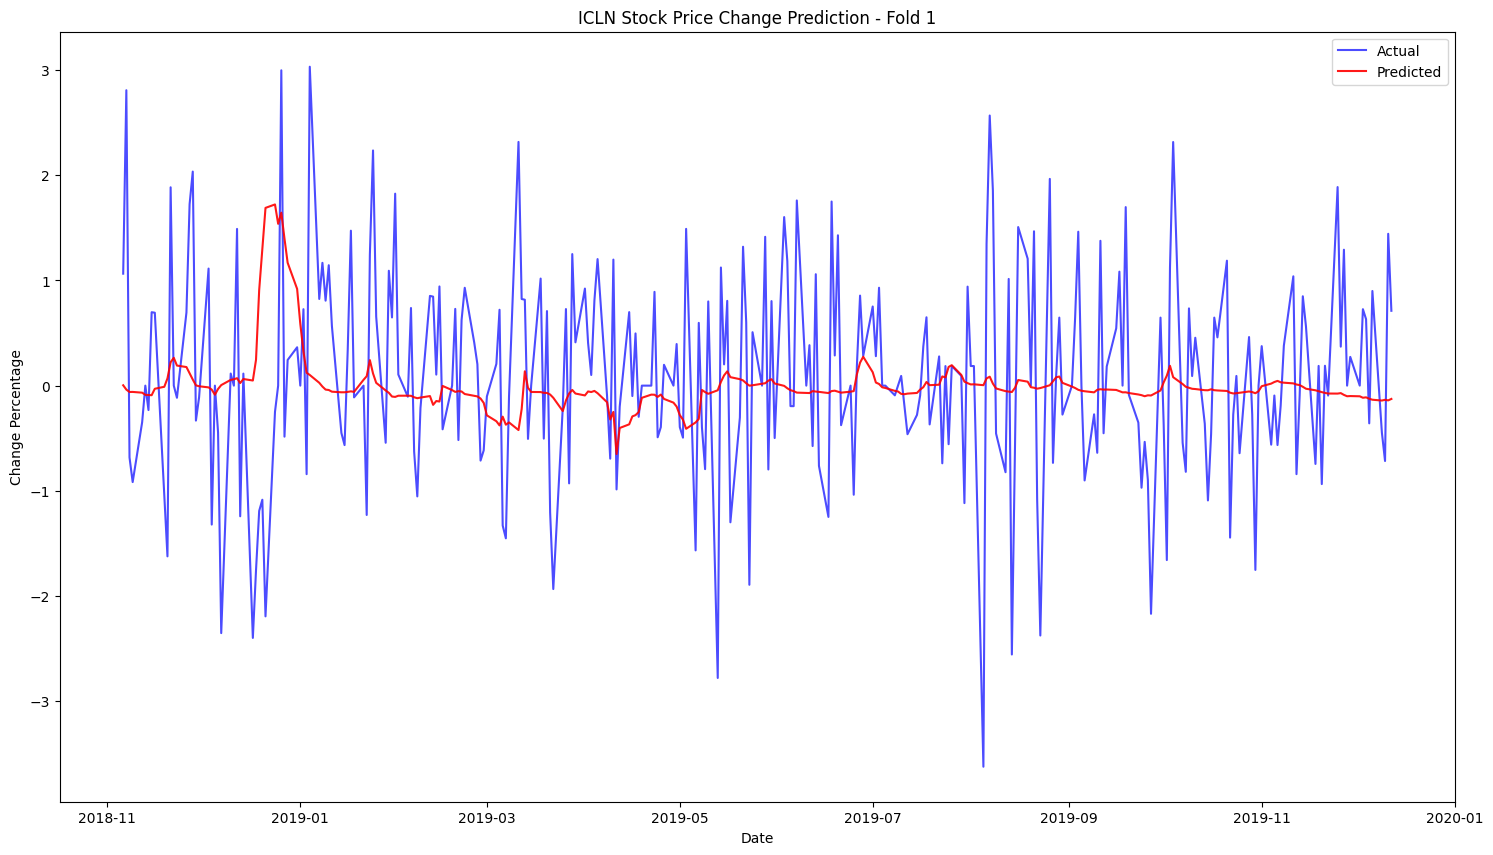

/opt/miniconda3/envs/fintech_env/lib/python3.12/site-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Fold 2, Epoch [10/100], Loss: 0.3006, Val Loss: 2.2623
Fold 2, Epoch [20/100], Loss: 0.3000, Val Loss: 2.2625
Fold 2, Epoch [30/100], Loss: 0.2953, Val Loss: 2.2513
Fold 2, Epoch [40/100], Loss: 0.2909, Val Loss: 2.2439
Fold 2, Epoch [50/100], Loss: 0.2878, Val Loss: 2.2459
Fold 2, Epoch [60/100], Loss: 0.2824, Val Loss: 2.2422
Fold 2, Epoch [70/100], Loss: 0.2788, Val Loss: 2.2356
Fold 2, Epoch [80/100], Loss: 0.2687, Val Loss: 2.2428
Fold 2, Epoch [90/100], Loss: 0.2606, Val Loss: 2.2847
Fold 2, Epoch [100/100], Loss: 0.2538, Val Loss: 2.3390
Mean Absolute Error: 1.8314, Mean Squared Error: 7.5815


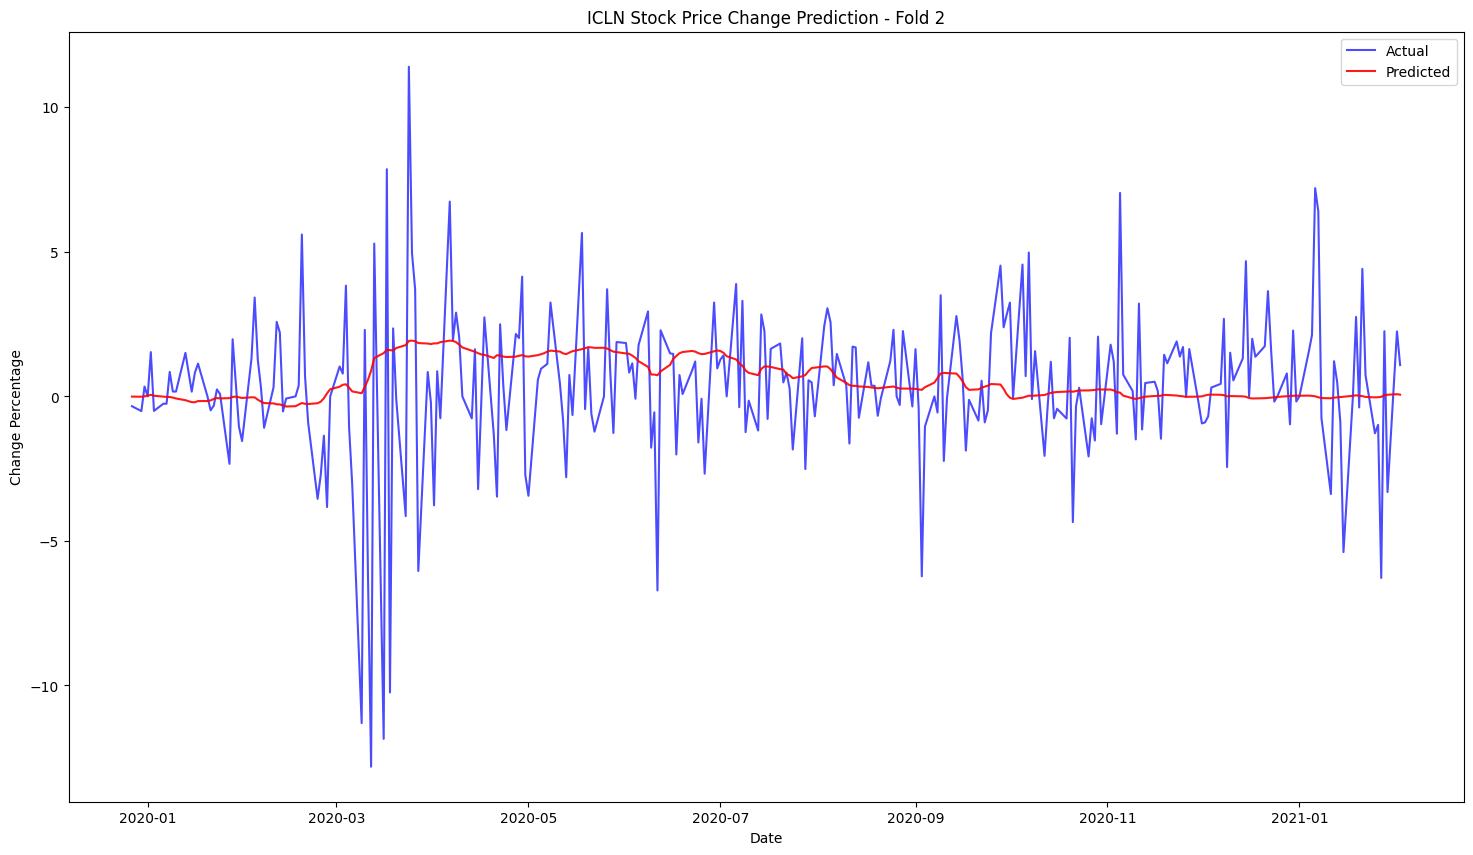

/opt/miniconda3/envs/fintech_env/lib/python3.12/site-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Fold 3, Epoch [10/100], Loss: 0.9279, Val Loss: 1.4094
Fold 3, Epoch [20/100], Loss: 0.9180, Val Loss: 1.5121
Fold 3, Epoch [30/100], Loss: 0.9113, Val Loss: 1.4902
Fold 3, Epoch [40/100], Loss: 0.9070, Val Loss: 1.4828
Fold 3, Epoch [50/100], Loss: 0.8586, Val Loss: 1.6429
Fold 3, Epoch [60/100], Loss: 0.8316, Val Loss: 2.5521
Fold 3, Epoch [70/100], Loss: 0.8906, Val Loss: 2.0974
Fold 3, Epoch [80/100], Loss: 0.8343, Val Loss: 2.8327
Fold 3, Epoch [90/100], Loss: 0.8187, Val Loss: 2.5753
Fold 3, Epoch [100/100], Loss: 0.7968, Val Loss: 2.6459
Mean Absolute Error: 2.3632, Mean Squared Error: 8.5762


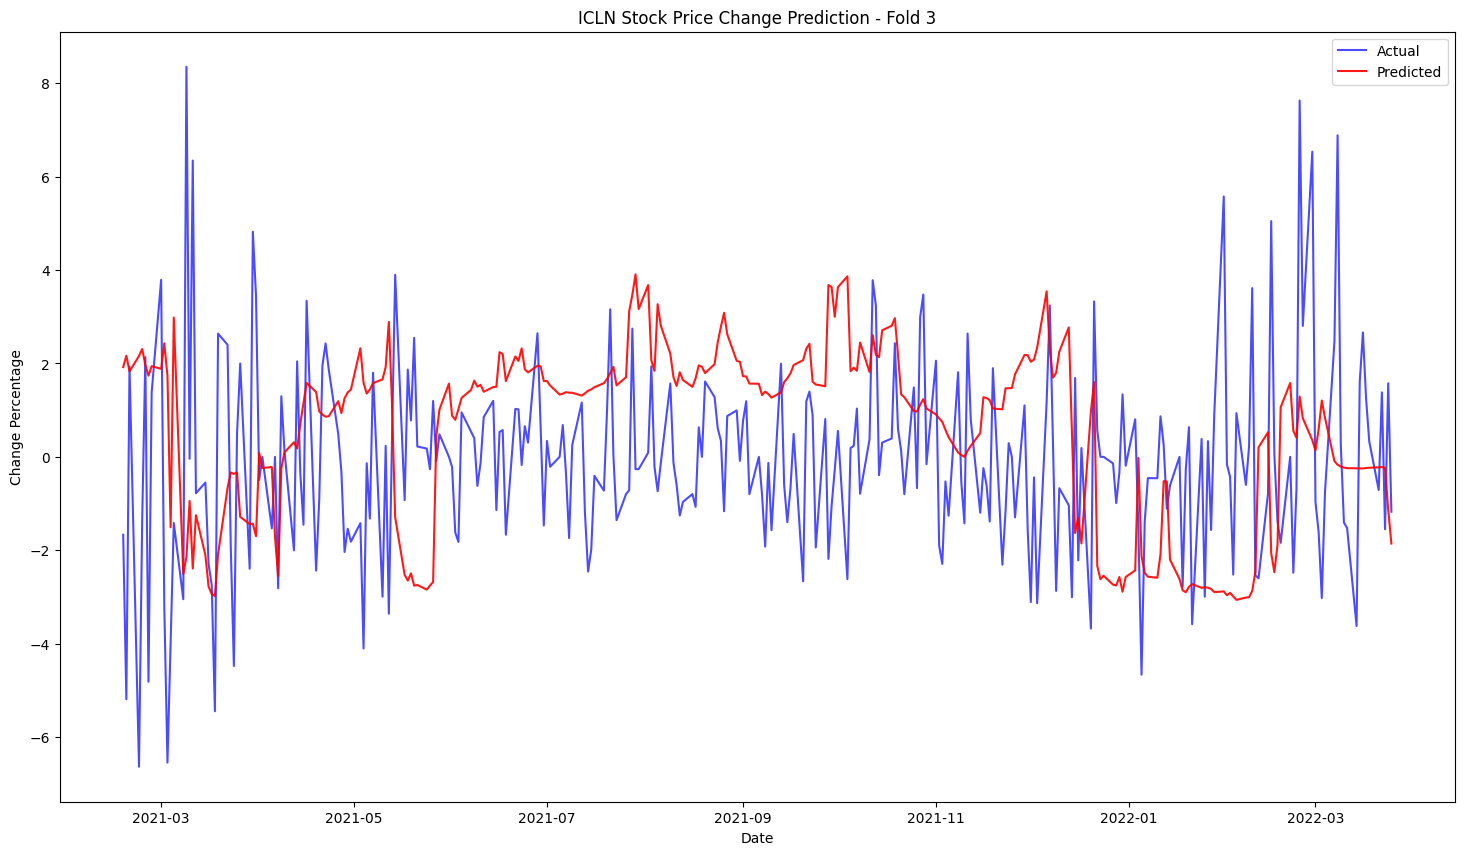

/opt/miniconda3/envs/fintech_env/lib/python3.12/site-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Fold 4, Epoch [10/100], Loss: 1.0265, Val Loss: 1.1430
Fold 4, Epoch [20/100], Loss: 1.0109, Val Loss: 1.1268
Fold 4, Epoch [30/100], Loss: 1.0011, Val Loss: 1.1479
Fold 4, Epoch [40/100], Loss: 0.9880, Val Loss: 1.1618
Fold 4, Epoch [50/100], Loss: 0.9607, Val Loss: 1.1610
Fold 4, Epoch [60/100], Loss: 0.9305, Val Loss: 1.1847
Fold 4, Epoch [70/100], Loss: 0.8698, Val Loss: 1.3571
Fold 4, Epoch [80/100], Loss: 0.8240, Val Loss: 1.4190
Fold 4, Epoch [90/100], Loss: 0.7956, Val Loss: 1.6417
Fold 4, Epoch [100/100], Loss: 0.7516, Val Loss: 1.8277
Mean Absolute Error: 1.7996, Mean Squared Error: 5.9243


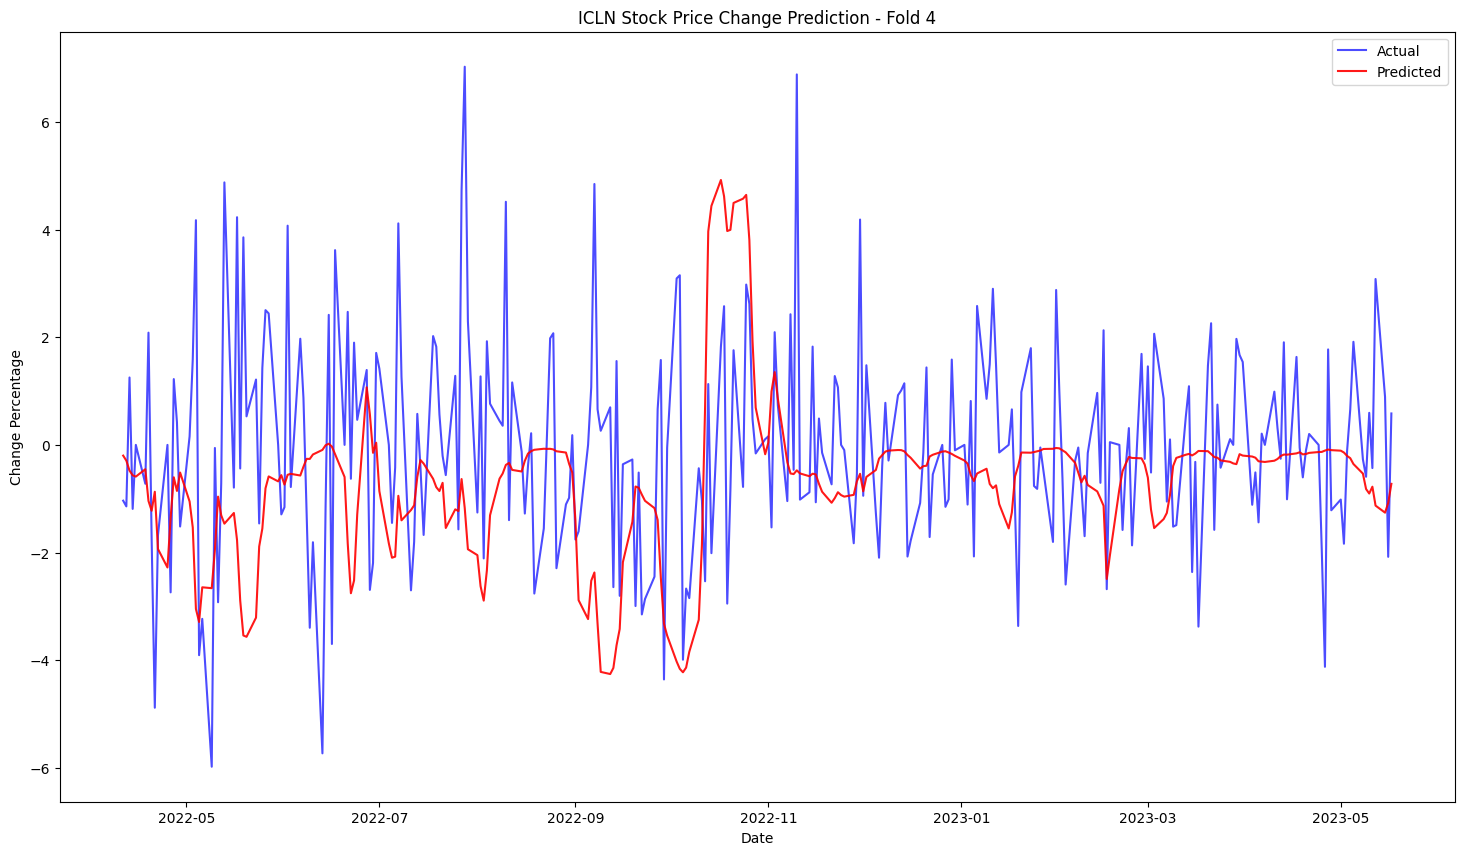

/opt/miniconda3/envs/fintech_env/lib/python3.12/site-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Fold 5, Epoch [10/100], Loss: 1.0521, Val Loss: 0.7641
Fold 5, Epoch [20/100], Loss: 1.0275, Val Loss: 0.7713
Fold 5, Epoch [30/100], Loss: 1.0186, Val Loss: 0.7826
Fold 5, Epoch [40/100], Loss: 1.0113, Val Loss: 0.7871
Fold 5, Epoch [50/100], Loss: 0.9926, Val Loss: 0.8371
Fold 5, Epoch [60/100], Loss: 0.9820, Val Loss: 0.8541
Fold 5, Epoch [70/100], Loss: 0.9300, Val Loss: 0.8869
Fold 5, Epoch [80/100], Loss: 0.8939, Val Loss: 0.9366
Fold 5, Epoch [90/100], Loss: 0.8568, Val Loss: 0.9724
Fold 5, Epoch [100/100], Loss: 0.8358, Val Loss: 1.0480
Mean Absolute Error: 1.4803, Mean Squared Error: 3.3969


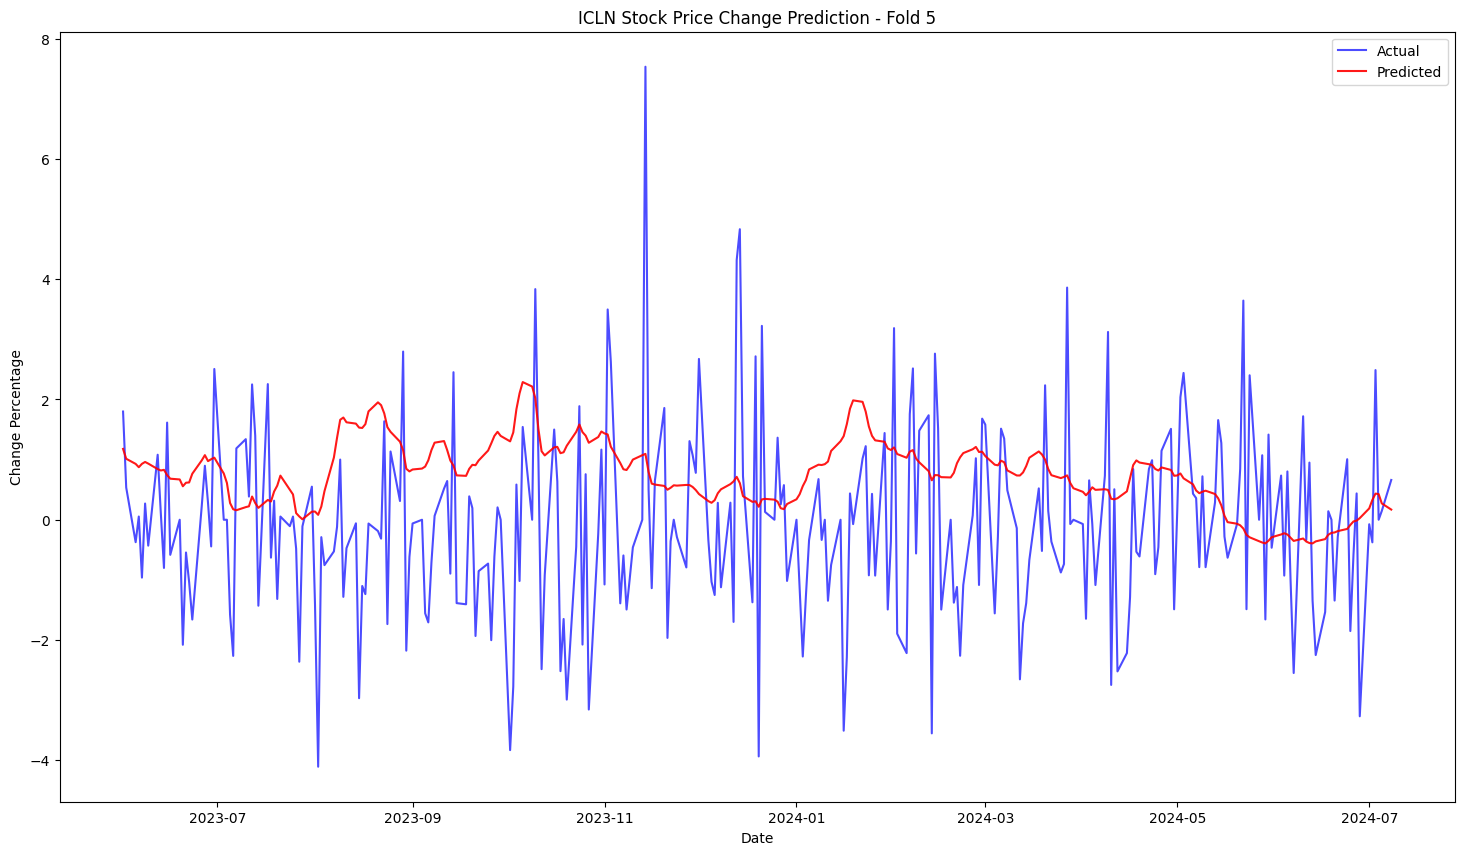

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

# Load and Prepare Data
df = pd.read_csv('ICLN_data_with_sentiment.csv', parse_dates=['Date'], index_col='Date')
df['Change_Percentage'] = df['Close'].pct_change() * 100
df.dropna(inplace=True)

# Feature Scaling
features = df.drop('Change_Percentage', axis=1)
target = df['Change_Percentage']

# Scale the features
scaler_features = StandardScaler()
features_scaled = scaler_features.fit_transform(features)

# Scale the target
scaler_target = StandardScaler()
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))

data_scaled = np.hstack((features_scaled, target_scaled))

# Create Sequences
def create_sequences(data, target_col, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length][target_col]
        sequences.append(seq)
        targets.append(label)
    return sequences, targets

seq_length = 10

# TimeSeriesSplit Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
fold = 0

for train_index, test_index in tscv.split(data_scaled):
    fold += 1
    
    # Create sequences for training and testing based on each split
    train_data, test_data = data_scaled[train_index], data_scaled[test_index]
    X_train_seq, y_train_seq = create_sequences(train_data, -1, seq_length)
    X_test_seq, y_test_seq = create_sequences(test_data, -1, seq_length)
    
    # Convert data to PyTorch tensors
    X_train = torch.tensor(X_train_seq, dtype=torch.float32)
    y_train = torch.tensor(y_train_seq, dtype=torch.float32).view(-1, 1)
    X_test = torch.tensor(X_test_seq, dtype=torch.float32)
    y_test = torch.tensor(y_test_seq, dtype=torch.float32).view(-1, 1)

    # Define LSTM Model
    class LSTMModel(nn.Module):
        def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.2):
            super(LSTMModel, self).__init__()
            self.hidden_size = hidden_size
            self.num_layers = num_layers

            # LSTM Layer
            self.lstm = nn.LSTM(
                input_size, hidden_size, num_layers,
                batch_first=True, dropout=dropout, bidirectional=False
            )

            # Additional LSTM Layer
            self.lstm2 = nn.LSTM(
                hidden_size, hidden_size, num_layers=1,
                batch_first=True, dropout=dropout, bidirectional=False
            )

            # Fully connected layers
            self.fc1 = nn.Linear(hidden_size, hidden_size)
            self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
            self.fc3 = nn.Linear(hidden_size // 2, output_size)

            # Activation and Dropout
            self.relu = nn.ReLU()
            self.dropout = nn.Dropout(dropout)

        def forward(self, x):
            # x shape: (batch_size, seq_length, input_size)
            batch_size, seq_length, _ = x.size()

            # Initialize hidden and cell states
            h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
            c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)

            # LSTM output
            out, _ = self.lstm(x, (h0, c0))  # out: (batch_size, seq_length, hidden_size)
            out, _ = self.lstm2(out)  # Additional LSTM layer
            out = out[:, -1, :]  # Take the last output of the sequence

            # Fully connected layers
            out = self.dropout(self.relu(self.fc1(out)))
            out = self.dropout(self.relu(self.fc2(out)))
            out = self.fc3(out)
            return out

    # Instantiate Model
    input_size = X_train.shape[2]
    hidden_size = 128
    num_layers = 2
    output_size = 1

    model = LSTMModel(input_size, hidden_size, num_layers, output_size)

    # Loss and Optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Train the Model
    num_epochs = 100
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()

        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_test)
            val_loss = criterion(val_outputs, y_test)
            val_losses.append(val_loss.item())

        if (epoch + 1) % 10 == 0:
            print(f'Fold {fold}, Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

    # Predictions
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)

    y_pred_np = y_pred.numpy()
    y_test_np = y_test.numpy()

    # Inverse Transform
    predictions_original_scale = scaler_target.inverse_transform(y_pred_np)
    actuals_original_scale = scaler_target.inverse_transform(y_test_np)

    # Evaluation
    mae = mean_absolute_error(actuals_original_scale, predictions_original_scale)
    mse = mean_squared_error(actuals_original_scale, predictions_original_scale)
    print(f'Mean Absolute Error: {mae:.4f}, Mean Squared Error: {mse:.4f}')

    # Plot Results for this fold
    test_dates = df.index[test_index[seq_length:]]  # Align test dates
    plt.figure(figsize=(18, 10))
    plt.plot(test_dates, actuals_original_scale, label='Actual', color='blue', alpha=0.7)
    plt.plot(test_dates, predictions_original_scale, label='Predicted', color='red', alpha=0.9)
    plt.title(f'ICLN Stock Price Change Prediction - Fold {fold}')
    plt.xlabel('Date')
    plt.ylabel('Change Percentage')
    plt.legend()
    plt.show()


## LSTM-Attention


Fold 1, Epoch [10/100], Loss: 0.3373, Val Loss: 0.3112
Fold 1, Epoch [20/100], Loss: 0.3399, Val Loss: 0.3161
Fold 1, Epoch [30/100], Loss: 0.2851, Val Loss: 0.3180
Fold 1, Epoch [40/100], Loss: 0.2934, Val Loss: 0.3138
Fold 1, Epoch [50/100], Loss: 0.2911, Val Loss: 0.3132
Fold 1, Epoch [60/100], Loss: 0.2867, Val Loss: 0.3169
Fold 1, Epoch [70/100], Loss: 0.2637, Val Loss: 0.3225
Fold 1, Epoch [80/100], Loss: 0.2274, Val Loss: 0.3416
Fold 1, Epoch [90/100], Loss: 0.2452, Val Loss: 0.3873
Fold 1, Epoch [100/100], Loss: 0.2360, Val Loss: 0.4504
Mean Absolute Error: 0.5215, Mean Squared Error: 0.4504


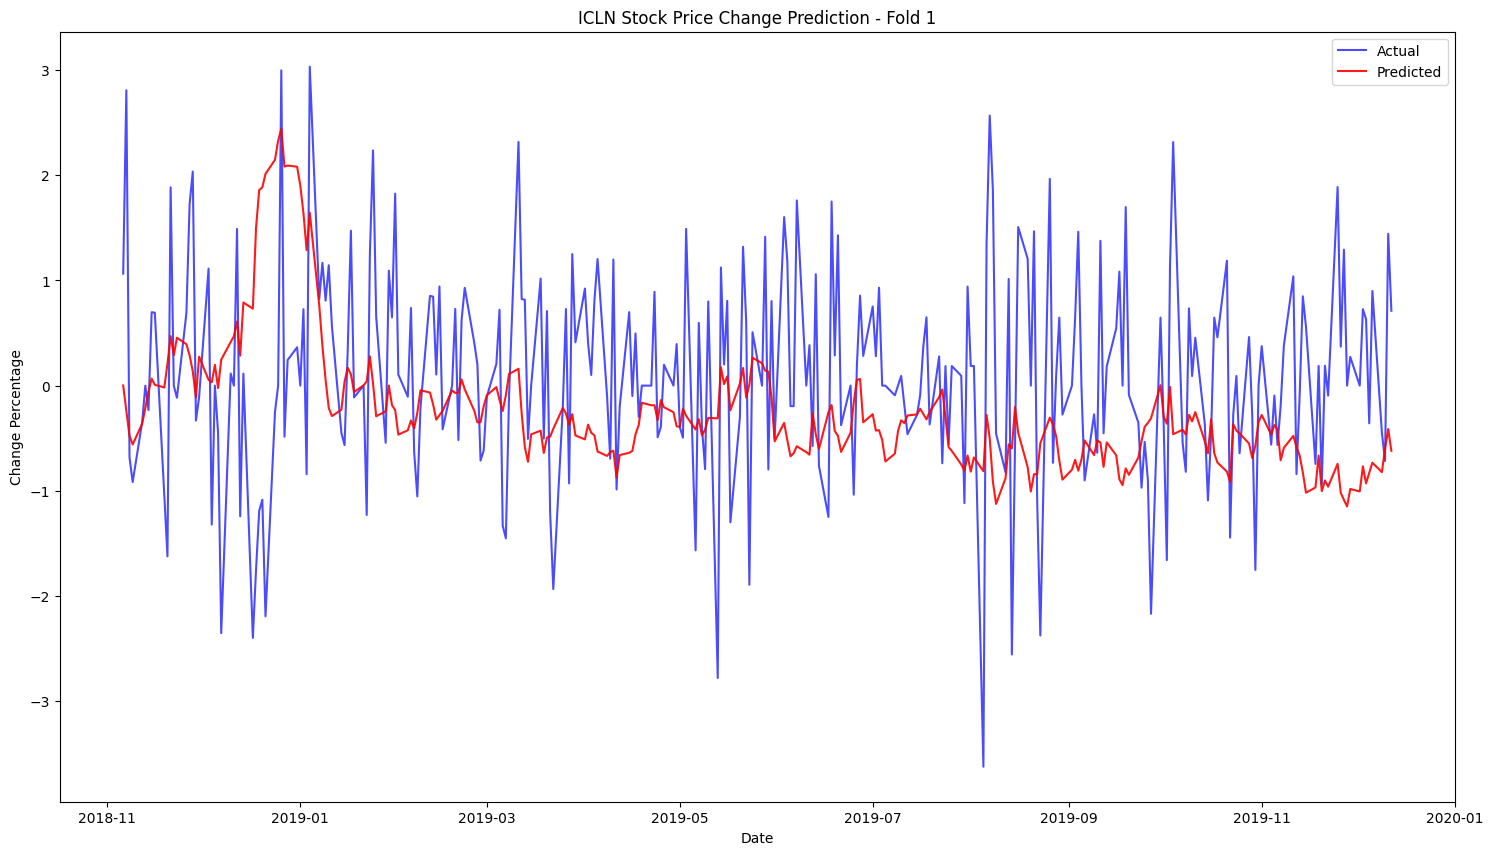

Fold 2, Epoch [10/100], Loss: 0.3695, Val Loss: 2.2612
Fold 2, Epoch [20/100], Loss: 0.3461, Val Loss: 2.2624
Fold 2, Epoch [30/100], Loss: 0.3065, Val Loss: 2.2555
Fold 2, Epoch [40/100], Loss: 0.3212, Val Loss: 2.2413
Fold 2, Epoch [50/100], Loss: 0.3105, Val Loss: 2.2331
Fold 2, Epoch [60/100], Loss: 0.2952, Val Loss: 2.2369
Fold 2, Epoch [70/100], Loss: 0.3014, Val Loss: 2.2526
Fold 2, Epoch [80/100], Loss: 0.2975, Val Loss: 2.3430
Fold 2, Epoch [90/100], Loss: 0.2799, Val Loss: 2.6358
Fold 2, Epoch [100/100], Loss: 0.2815, Val Loss: 3.3942
Mean Absolute Error: 1.3045, Mean Squared Error: 3.3942


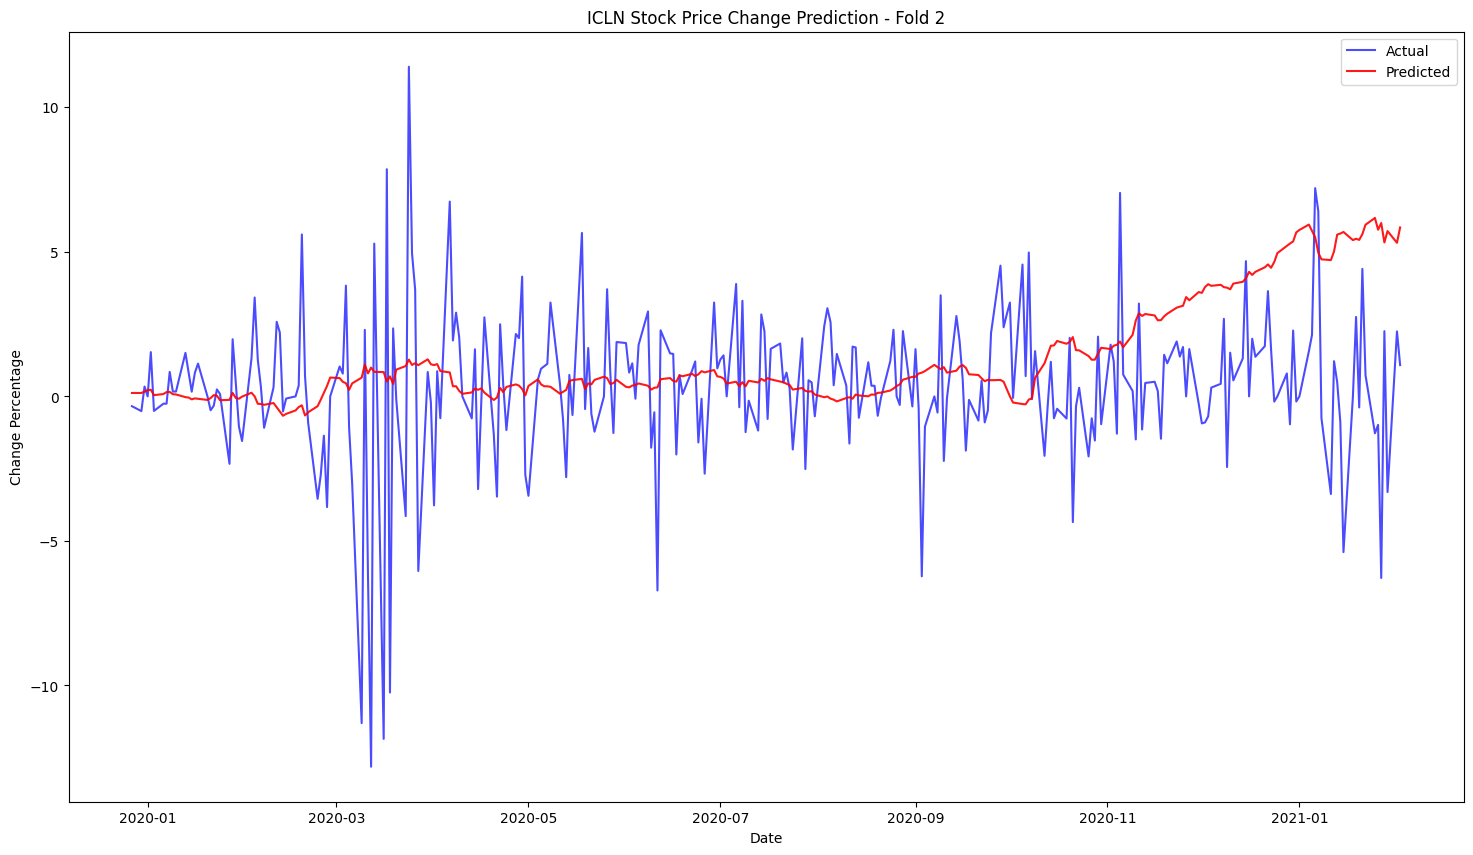

Fold 3, Epoch [10/100], Loss: 0.9138, Val Loss: 1.3697
Fold 3, Epoch [20/100], Loss: 0.7912, Val Loss: 1.3814
Fold 3, Epoch [30/100], Loss: 0.7754, Val Loss: 1.4046
Fold 3, Epoch [40/100], Loss: 0.7194, Val Loss: 1.4552
Fold 3, Epoch [50/100], Loss: 0.6937, Val Loss: 1.5143
Fold 3, Epoch [60/100], Loss: 0.6439, Val Loss: 1.5937
Fold 3, Epoch [70/100], Loss: 0.6356, Val Loss: 1.6141
Fold 3, Epoch [80/100], Loss: 0.6324, Val Loss: 1.6022
Fold 3, Epoch [90/100], Loss: 0.6601, Val Loss: 1.7328
Fold 3, Epoch [100/100], Loss: 0.5634, Val Loss: 1.7407
Mean Absolute Error: 1.0016, Mean Squared Error: 1.7407


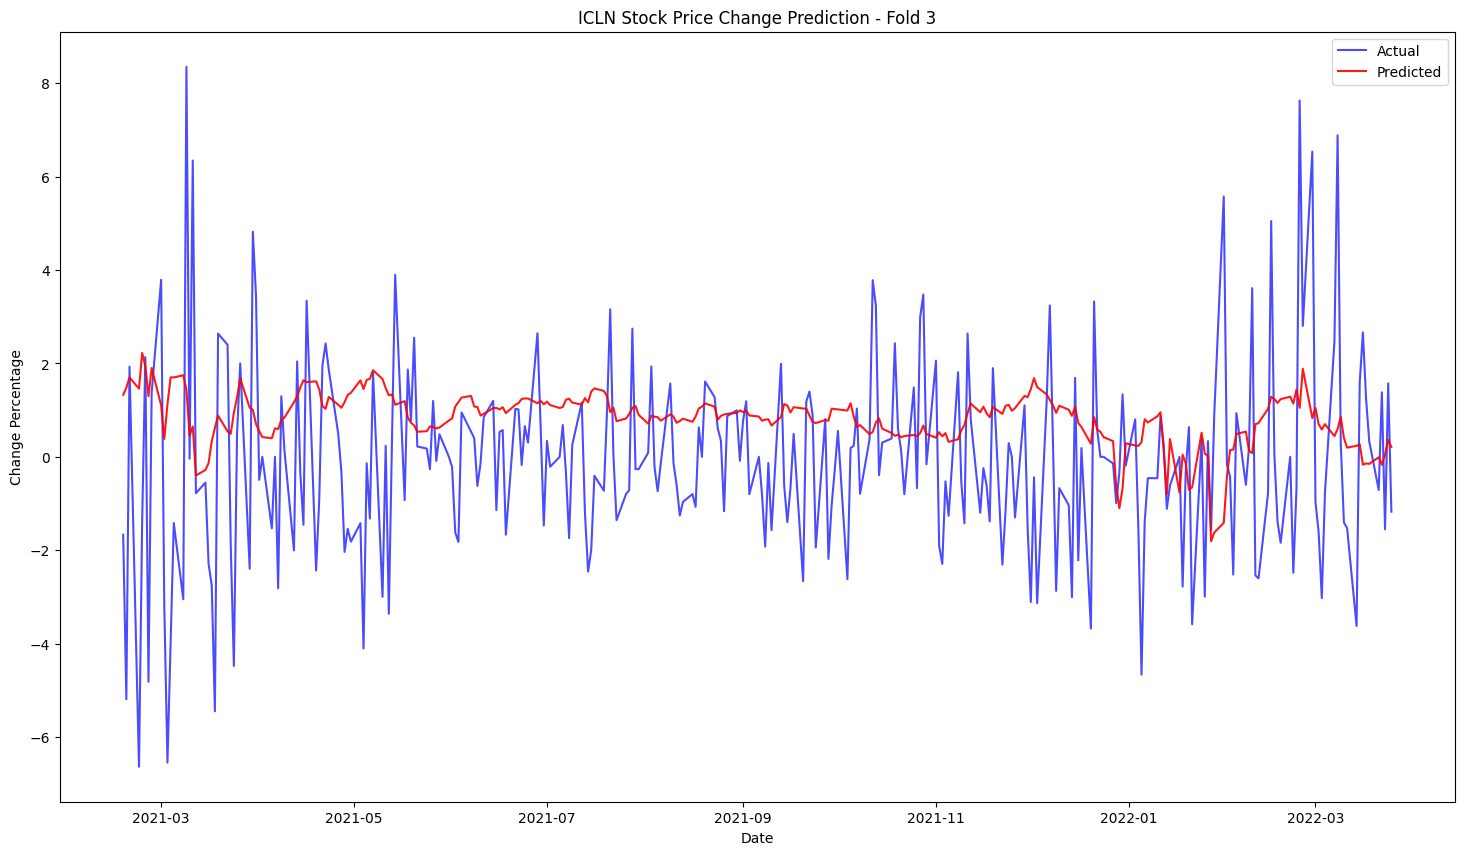

Fold 4, Epoch [10/100], Loss: 1.0738, Val Loss: 1.1565
Fold 4, Epoch [20/100], Loss: 1.0641, Val Loss: 1.1516
Fold 4, Epoch [30/100], Loss: 1.0204, Val Loss: 1.1481
Fold 4, Epoch [40/100], Loss: 1.0039, Val Loss: 1.1402
Fold 4, Epoch [50/100], Loss: 0.9490, Val Loss: 1.1386
Fold 4, Epoch [60/100], Loss: 0.8949, Val Loss: 1.1470
Fold 4, Epoch [70/100], Loss: 0.8178, Val Loss: 1.1476
Fold 4, Epoch [80/100], Loss: 0.7718, Val Loss: 1.1675
Fold 4, Epoch [90/100], Loss: 0.7385, Val Loss: 1.2164
Fold 4, Epoch [100/100], Loss: 0.7029, Val Loss: 1.3692
Mean Absolute Error: 0.8976, Mean Squared Error: 1.3692


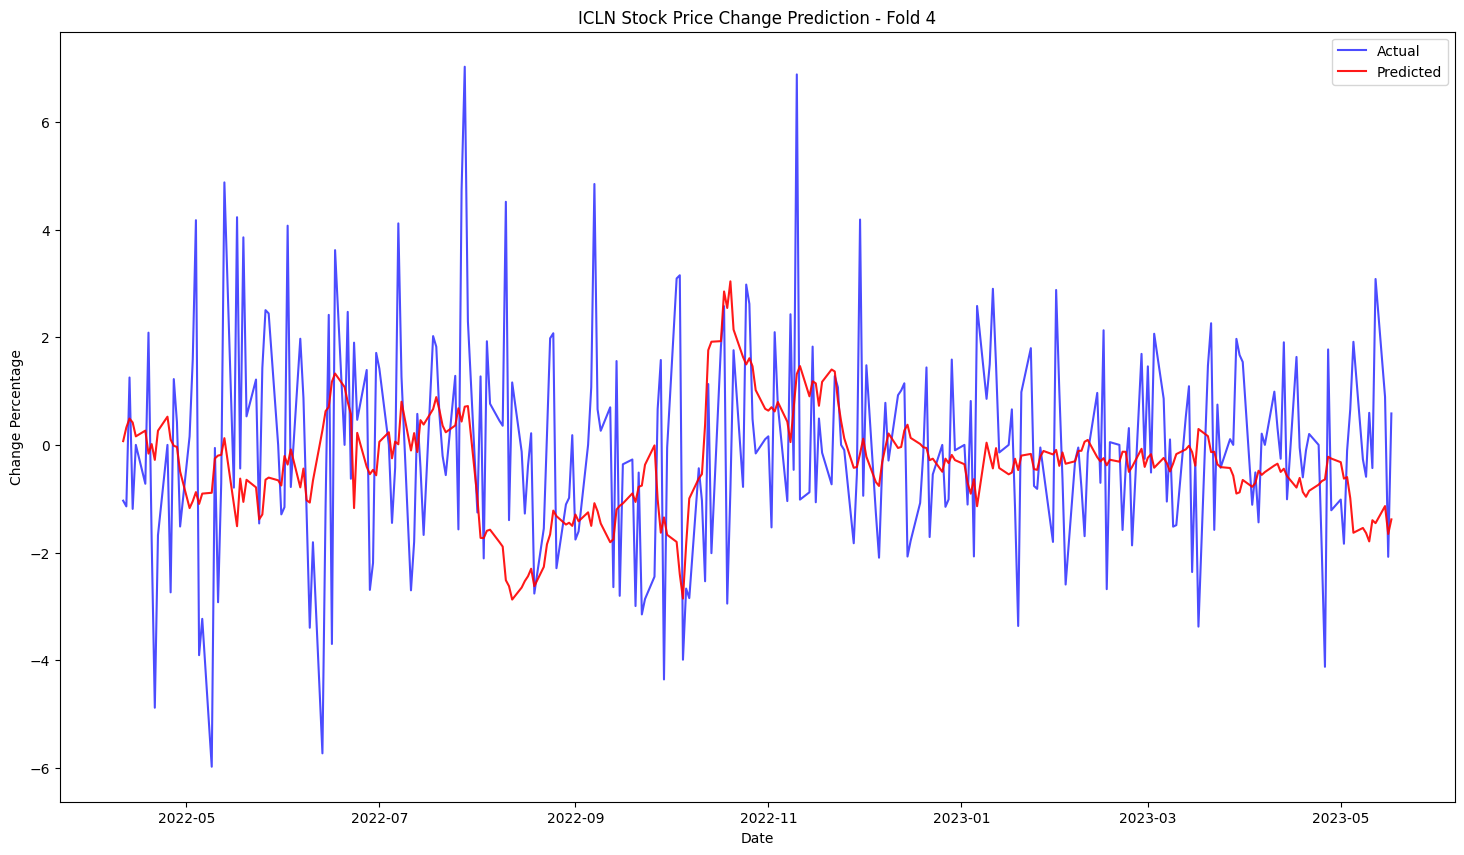

Fold 5, Epoch [10/100], Loss: 1.1058, Val Loss: 0.7872
Fold 5, Epoch [20/100], Loss: 1.0202, Val Loss: 0.7797
Fold 5, Epoch [30/100], Loss: 0.9873, Val Loss: 0.7752
Fold 5, Epoch [40/100], Loss: 0.9081, Val Loss: 0.7736
Fold 5, Epoch [50/100], Loss: 0.9192, Val Loss: 0.7711
Fold 5, Epoch [60/100], Loss: 0.8652, Val Loss: 0.7717
Fold 5, Epoch [70/100], Loss: 0.8704, Val Loss: 0.7718
Fold 5, Epoch [80/100], Loss: 0.8162, Val Loss: 0.7864
Fold 5, Epoch [90/100], Loss: 0.7787, Val Loss: 0.7802
Fold 5, Epoch [100/100], Loss: 0.7839, Val Loss: 0.7878
Mean Absolute Error: 0.6737, Mean Squared Error: 0.7878


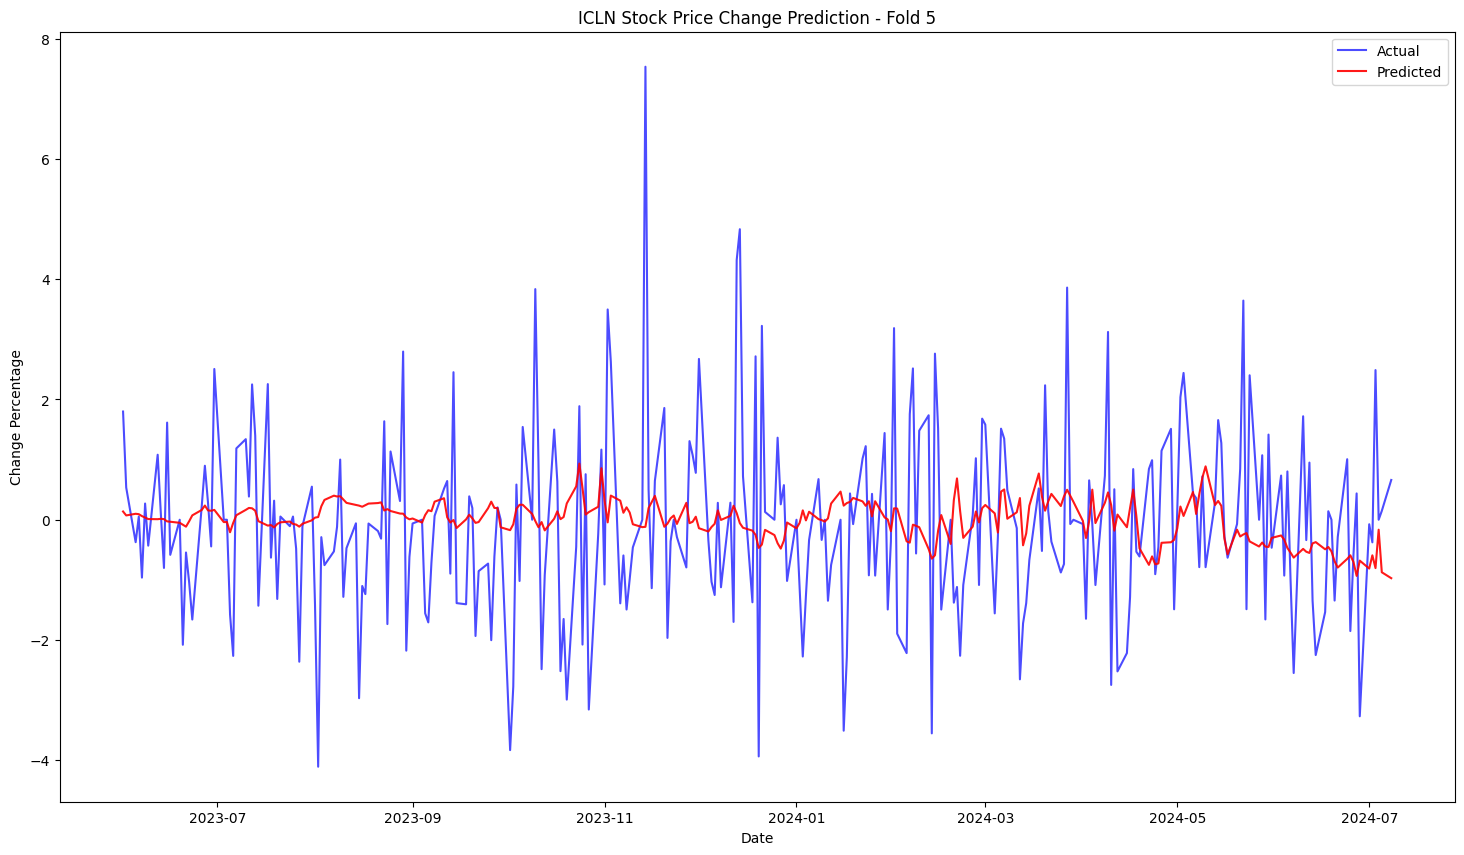

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Load and Prepare Data
df = pd.read_csv('ICLN_data_with_sentiment.csv', parse_dates=['Date'], index_col='Date')
df['Change_Percentage'] = df['Close'].pct_change() * 100
df.dropna(inplace=True)

# Feature Scaling
features = df.drop('Change_Percentage', axis=1)
target = df['Change_Percentage']

# Scale the features
scaler_features = StandardScaler()
features_scaled = scaler_features.fit_transform(features)

# Scale the target
scaler_target = StandardScaler()
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))

data_scaled = np.hstack((features_scaled, target_scaled))

# Create Sequences
def create_sequences(data, target_col, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        label = data[i + seq_length][target_col]
        sequences.append(seq)
        targets.append(label)
    return sequences, targets

seq_length = 10

# TimeSeriesSplit Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
fold = 0

for train_index, test_index in tscv.split(data_scaled):
    fold += 1
    
    # Create sequences for training and testing based on each split
    train_data, test_data = data_scaled[train_index], data_scaled[test_index]
    X_train_seq, y_train_seq = create_sequences(train_data, -1, seq_length)
    X_test_seq, y_test_seq = create_sequences(test_data, -1, seq_length)
    
    # Convert data to PyTorch tensors
    X_train = torch.tensor(X_train_seq, dtype=torch.float32)
    y_train = torch.tensor(y_train_seq, dtype=torch.float32).view(-1, 1)
    X_test = torch.tensor(X_test_seq, dtype=torch.float32)
    y_test = torch.tensor(y_test_seq, dtype=torch.float32).view(-1, 1)

    # Define LSTM Model
    class LSTMAttentionModel(nn.Module):
        def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.1):
            super(LSTMAttentionModel, self).__init__()
            self.hidden_size = hidden_size
            self.num_layers = num_layers

            # Bidirectional LSTM Layer
            self.lstm = nn.LSTM(
                input_size, hidden_size, num_layers,
                batch_first=True, dropout=dropout, bidirectional=True
            )

            # Attention Layer
            self.attention_layer = nn.Linear(hidden_size * 2, 1)

            # Fully connected layers
            self.fc1 = nn.Linear(hidden_size * 2, hidden_size)
            self.fc2 = nn.Linear(hidden_size, output_size)

            # Activation and Dropout
            self.relu = nn.ReLU()
            self.dropout = nn.Dropout(dropout)

        def forward(self, x):
            # x shape: (batch_size, seq_length, input_size)
            batch_size, seq_length, _ = x.size()

            # Initialize hidden and cell states
            h0 = torch.zeros(self.num_layers * 2, batch_size, self.hidden_size).to(x.device)  # Bidirectional
            c0 = torch.zeros(self.num_layers * 2, batch_size, self.hidden_size).to(x.device)

            # LSTM output
            out, _ = self.lstm(x, (h0, c0))  # out: (batch_size, seq_length, hidden_size * 2)

            # Attention mechanism
            attn_weights = torch.softmax(self.attention_layer(out), dim=1)  # (batch_size, seq_length, 1)
            context = torch.bmm(attn_weights.transpose(1, 2), out).squeeze(1)  # (batch_size, hidden_size * 2)

            # Fully connected layers
            out = self.dropout(self.relu(self.fc1(context)))
            out = self.fc2(out)
            return out

    # Instantiate Model
    input_size = X_train.shape[2]
    hidden_size = 64
    num_layers = 2
    output_size = 1

    model = LSTMModel(input_size, hidden_size, num_layers, output_size)

    # Loss and Optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Train the Model
    num_epochs = 100
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()

        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_test)
            val_loss = criterion(val_outputs, y_test)
            val_losses.append(val_loss.item())

        if (epoch + 1) % 10 == 0:
            print(f'Fold {fold}, Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

    # # Plot Loss for this fold
    # plt.figure(figsize=(12, 6))
    # plt.plot(train_losses, label='Training Loss')
    # plt.plot(val_losses, label='Validation Loss')
    # plt.xlabel('Epoch')
    # plt.ylabel('Loss')
    # plt.legend()
    # plt.title(f'Training and Validation Loss - Fold {fold}')
    # plt.show()

    # Predictions
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)

    y_pred_np = y_pred.numpy()
    y_test_np = y_test.numpy()

    # Inverse Transform
    predictions_original_scale = scaler_target.inverse_transform(y_pred_np)
    actuals_original_scale = scaler_target.inverse_transform(y_test_np)

    # Evaluation
    mae = mean_absolute_error(y_test_np, y_pred_np)
    mse = mean_squared_error(y_test_np, y_pred_np)
    print(f'Mean Absolute Error: {mae:.4f}, Mean Squared Error: {mse:.4f}')

    # Plot Results for this fold
    test_dates = df.index[test_index[seq_length:]]  # Align test dates
    plt.figure(figsize=(18, 10))
    plt.plot(test_dates, actuals_original_scale, label='Actual', color='blue', alpha=0.7)
    plt.plot(test_dates, predictions_original_scale, label='Predicted', color='red', alpha=0.9)
    plt.title(f'ICLN Stock Price Change Prediction - Fold {fold}')
    plt.xlabel('Date')
    plt.ylabel('Change Percentage')
    plt.legend()
    plt.show()


# CNN

Fold 1 - Test Mean Absolute Error: 0.5661
Fold 1 - Test Mean Squared Error: 0.4684


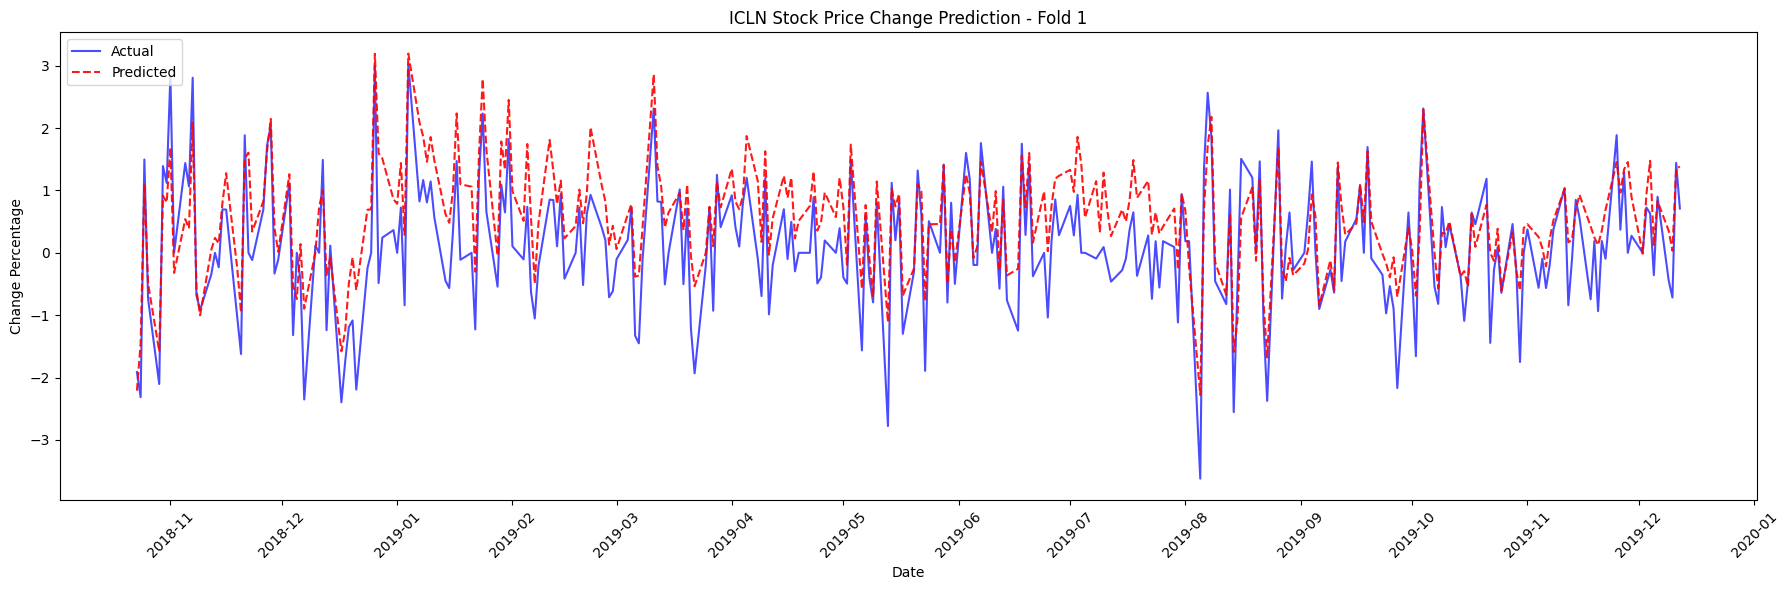

Fold 2 - Test Mean Absolute Error: 1.1398
Fold 2 - Test Mean Squared Error: 3.1389


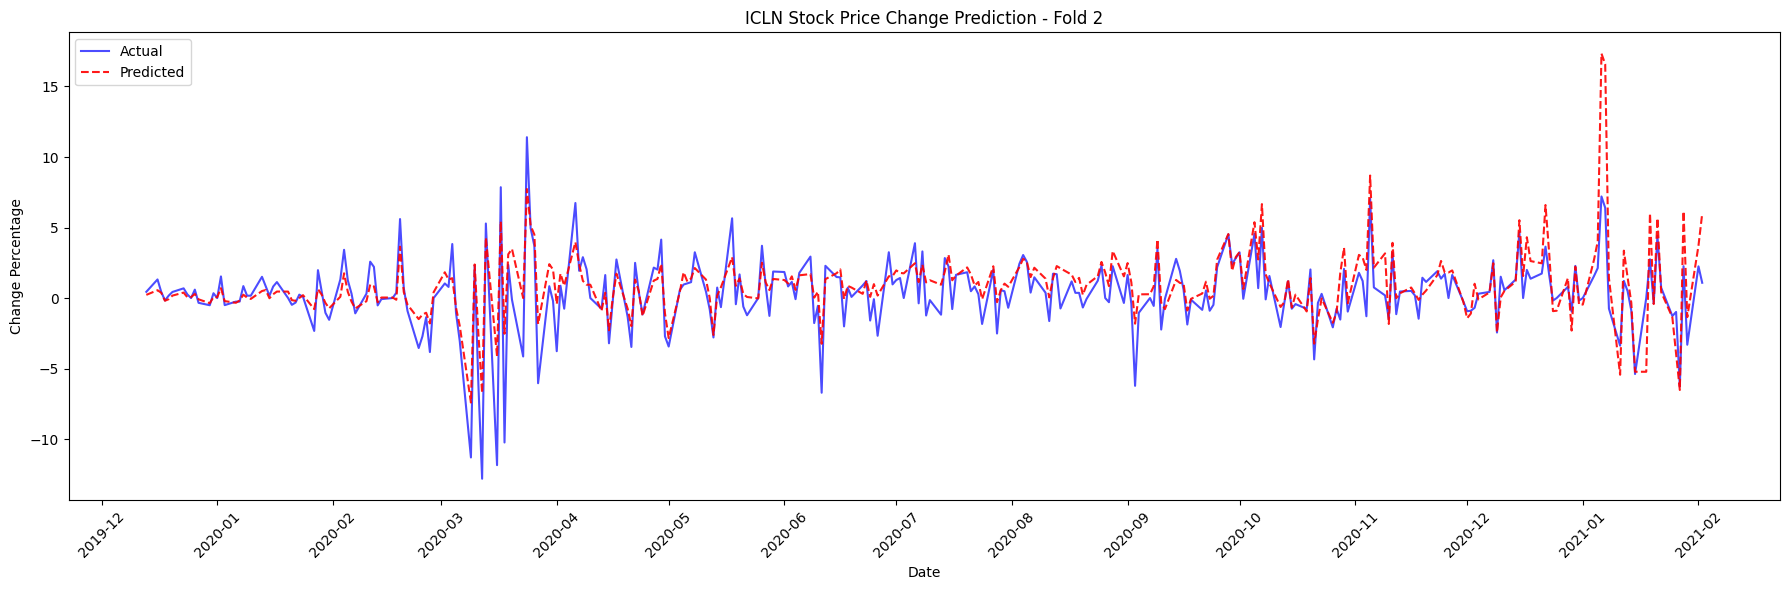

Fold 3 - Test Mean Absolute Error: 3.0195
Fold 3 - Test Mean Squared Error: 13.0041


Fold 4 - Test Mean Absolute Error: 1.8323
Fold 4 - Test Mean Squared Error: 5.9827


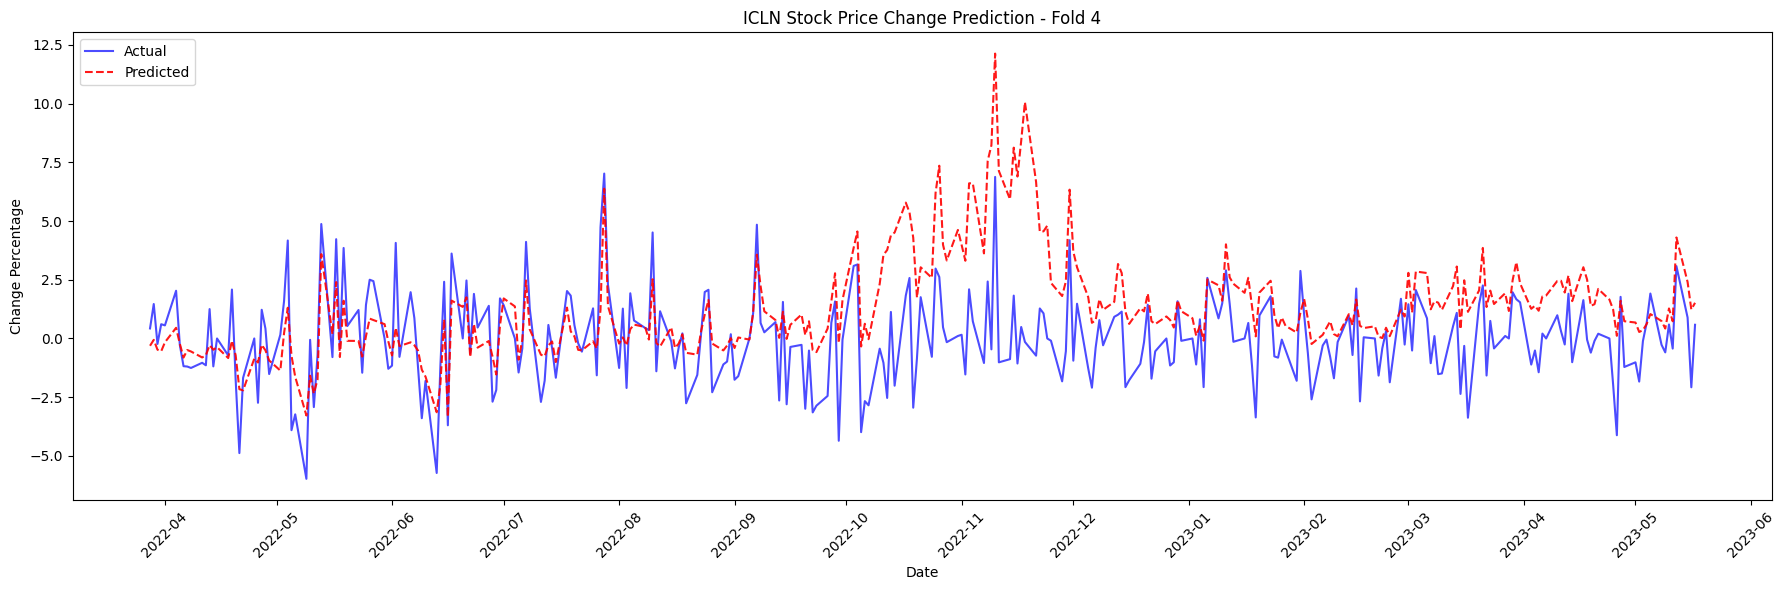

Fold 5 - Test Mean Absolute Error: 0.8644
Fold 5 - Test Mean Squared Error: 1.2360


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Load and Prepare Data
df = pd.read_csv('ICLN_data_with_sentiment.csv', index_col='Date')
df['Close_Percentage_Change'] = df['Close'].pct_change() * 100
df.dropna(inplace=True)

# Extract features and target
features = df.drop('Close_Percentage_Change', axis=1).values
target = df['Close_Percentage_Change'].values

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

fold = 0

# Loop through the splits
for train_index, test_index in tscv.split(features):
    fold += 1
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = target[train_index], target[test_index]

    # Scaling within the fold
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Build Advanced Neural Network Model
    class AdvancedNeuralNetwork(nn.Module):
        def __init__(self, input_dim):
            super(AdvancedNeuralNetwork, self).__init__()
            self.fc1 = nn.Linear(input_dim, 128)
            self.bn1 = nn.BatchNorm1d(128)
            self.dropout1 = nn.Dropout(0.3)
            self.fc2 = nn.Linear(128, 64)
            self.bn2 = nn.BatchNorm1d(64)
            self.dropout2 = nn.Dropout(0.3)
            self.fc3 = nn.Linear(64, 32)
            self.fc4 = nn.Linear(32, 1)

        def forward(self, x):
            x = torch.relu(self.bn1(self.fc1(x)))
            x = self.dropout1(x)
            x = torch.relu(self.bn2(self.fc2(x)))
            x = self.dropout2(x)
            x = torch.relu(self.fc3(x))
            x = self.fc4(x)
            return x

    input_dim = X_train_scaled.shape[1]
    model = AdvancedNeuralNetwork(input_dim)

    # Define loss and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    model.train()
    for epoch in range(50):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        test_predictions = model(X_test_tensor).flatten().numpy()

    # Evaluation
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    print(f'Fold {fold} - Test Mean Absolute Error: {test_mae:.4f}')
    print(f'Fold {fold} - Test Mean Squared Error: {test_mse:.4f}')

    # Plot predictions for this fold
    plt.figure(figsize=(18, 6))
    test_dates = pd.to_datetime(df.index[test_index])
    plt.plot(test_dates, y_test, label='Actual', color='blue', alpha=0.7)
    plt.plot(test_dates, test_predictions, label='Predicted', color='red', linestyle='--', alpha=0.9)

    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.title(f'ICLN Stock Price Change Prediction - Fold {fold}')
    plt.xlabel('Date')
    plt.ylabel('Change Percentage')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()


# Transformer


/opt/miniconda3/envs/fintech_env/lib/python3.12/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Fold 1 - Test Mean Absolute Error: 0.5358
Fold 1 - Test Mean Squared Error: 0.5063


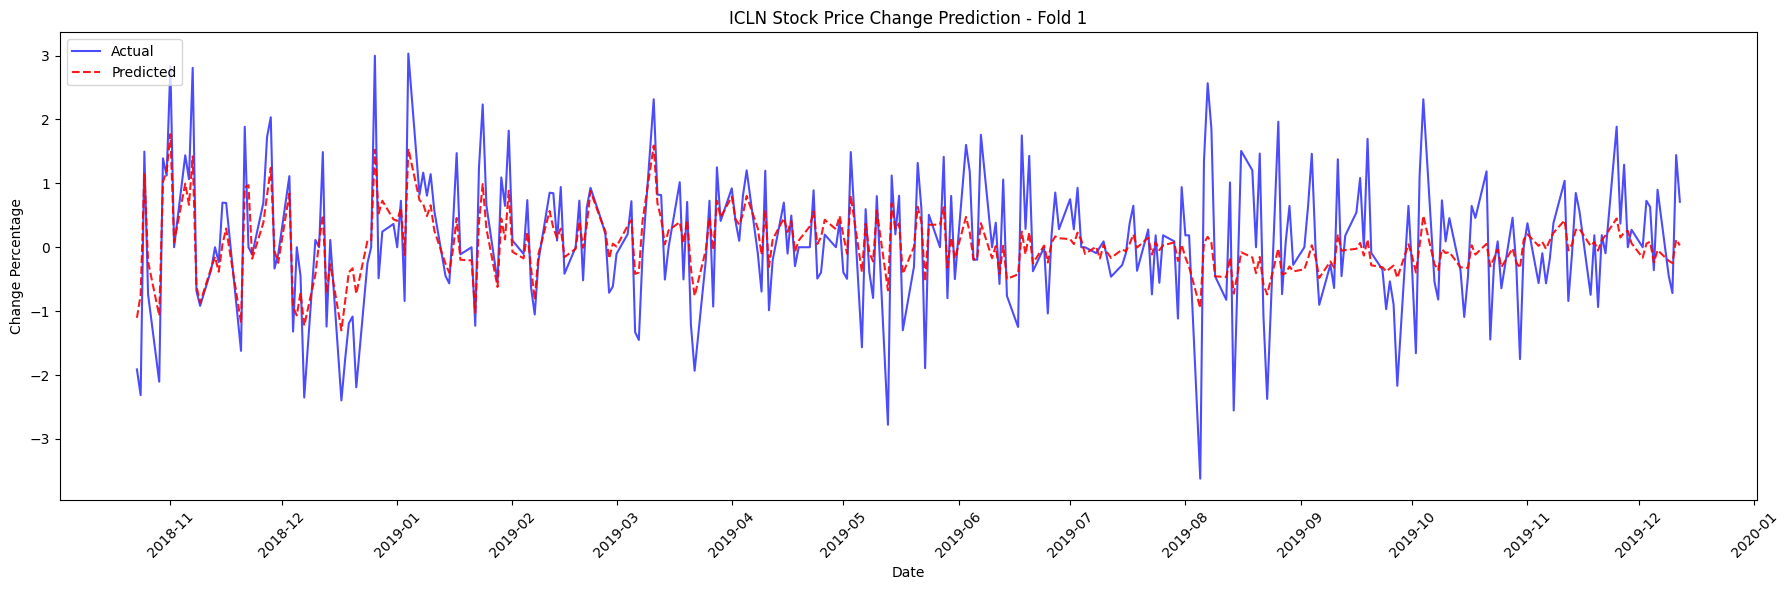

/opt/miniconda3/envs/fintech_env/lib/python3.12/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Fold 2 - Test Mean Absolute Error: 1.3419
Fold 2 - Test Mean Squared Error: 4.5613


/opt/miniconda3/envs/fintech_env/lib/python3.12/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Fold 3 - Test Mean Absolute Error: 1.1627
Fold 3 - Test Mean Squared Error: 2.1223


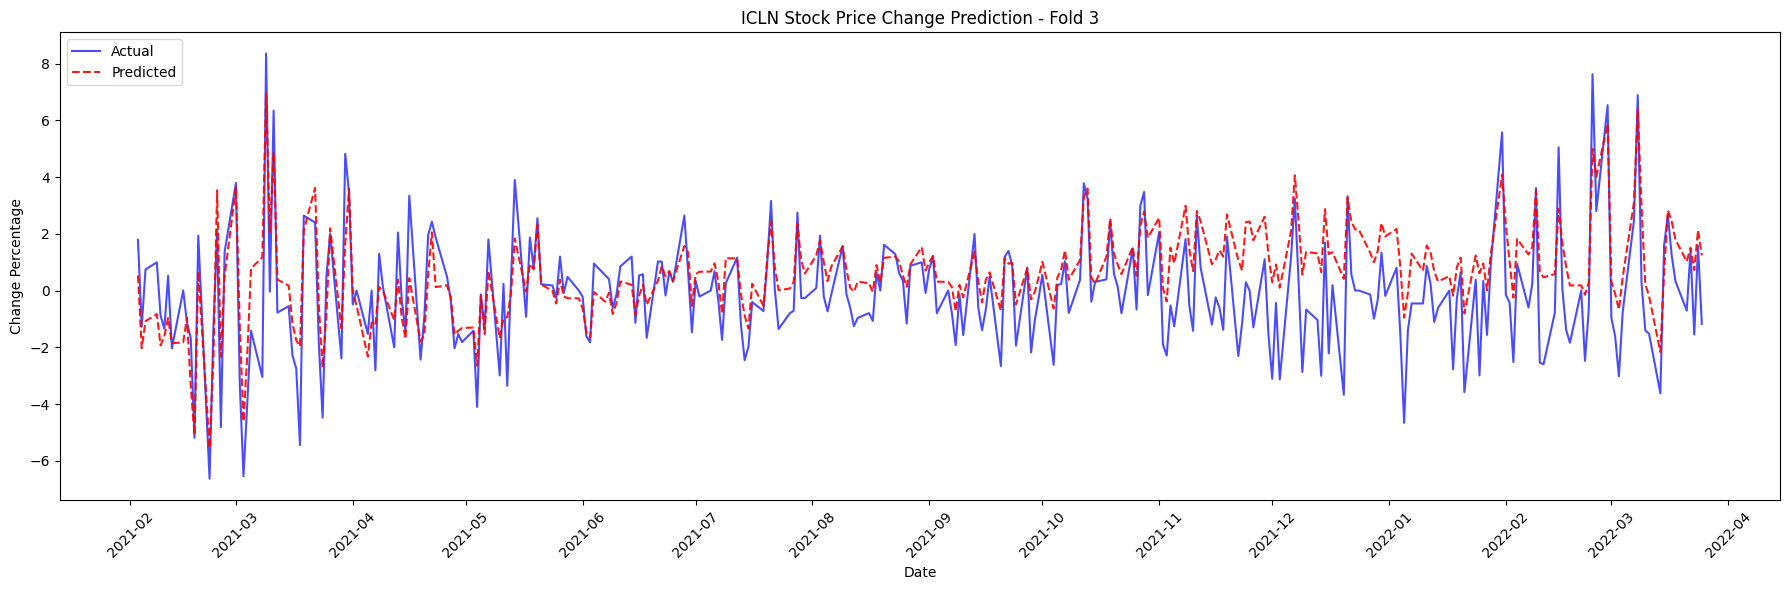

/opt/miniconda3/envs/fintech_env/lib/python3.12/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Fold 4 - Test Mean Absolute Error: 1.6251
Fold 4 - Test Mean Squared Error: 3.5528


/opt/miniconda3/envs/fintech_env/lib/python3.12/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Fold 5 - Test Mean Absolute Error: 0.8425
Fold 5 - Test Mean Squared Error: 1.0801


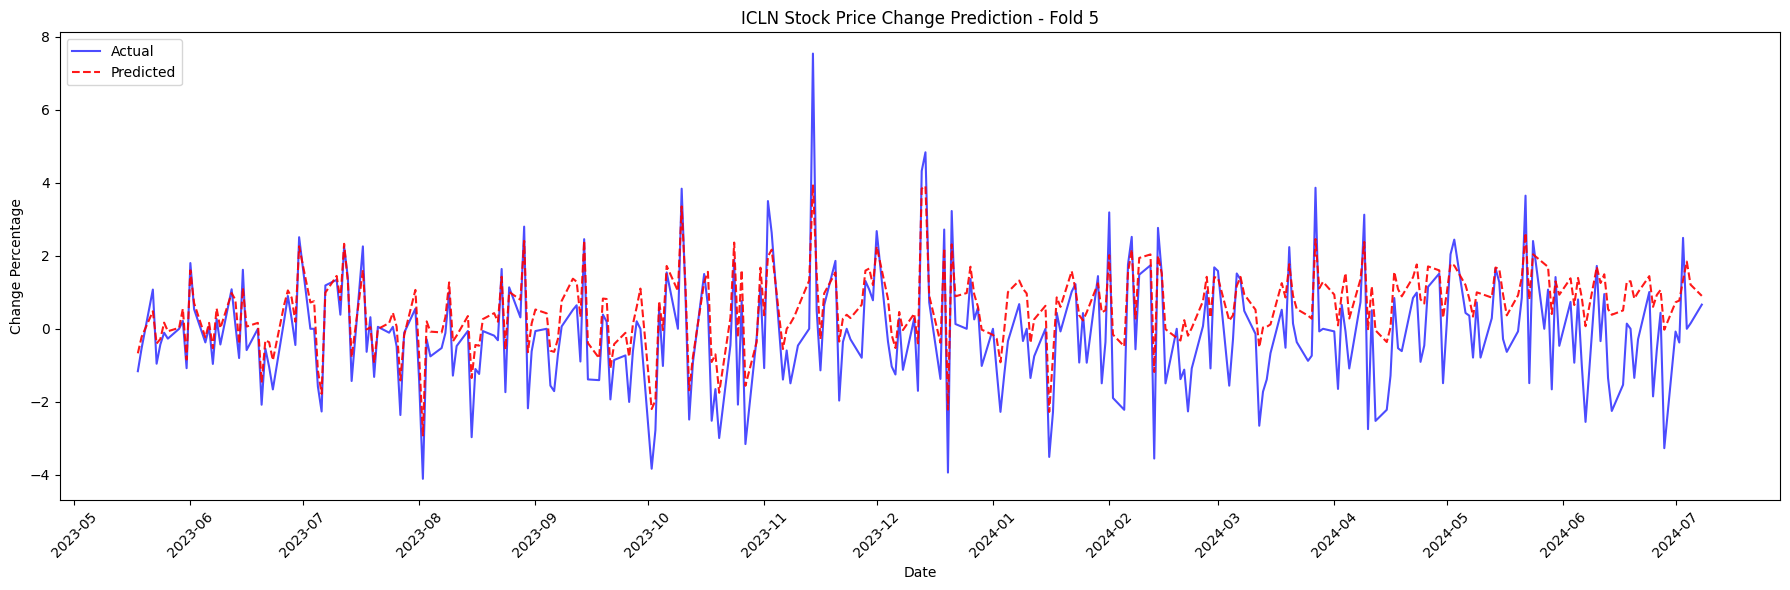

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Load and Prepare Data
df = pd.read_csv('ICLN_data_with_sentiment.csv', index_col='Date')
df['Close_Percentage_Change'] = df['Close'].pct_change() * 100
df.dropna(inplace=True)

# Extract features and target
features = df.drop('Close_Percentage_Change', axis=1).values
target = df['Close_Percentage_Change'].values

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

fold = 0

# Loop through the splits
for train_index, test_index in tscv.split(features):
    fold += 1
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = target[train_index], target[test_index]

    # Scaling within the fold
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Build Transformer Model
    class TransformerModel(nn.Module):
        def __init__(self, input_dim, d_model=64, nhead=4, num_encoder_layers=2, dim_feedforward=128):
            super(TransformerModel, self).__init__()
            self.input_layer = nn.Linear(input_dim, d_model)
            encoder_layers = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward)
            self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=num_encoder_layers)
            self.fc = nn.Linear(d_model, 1)

        def forward(self, x):
            x = self.input_layer(x)
            x = x.unsqueeze(1)  # Add sequence dimension
            x = self.transformer_encoder(x)
            x = x.mean(dim=1)  # Global average pooling
            x = self.fc(x)
            return x

    input_dim = X_train_scaled.shape[1]
    model = TransformerModel(input_dim)

    # Define loss and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    model.train()
    for epoch in range(50):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        test_predictions = model(X_test_tensor).flatten().numpy()

    # Evaluation
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    print(f'Fold {fold} - Test Mean Absolute Error: {test_mae:.4f}')
    print(f'Fold {fold} - Test Mean Squared Error: {test_mse:.4f}')

    # Plot predictions for this fold
    plt.figure(figsize=(18, 6))
    test_dates = pd.to_datetime(df.index[test_index])
    plt.plot(test_dates, y_test, label='Actual', color='blue', alpha=0.7)
    plt.plot(test_dates, test_predictions, label='Predicted', color='red', linestyle='--', alpha=0.9)

    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.title(f'ICLN Stock Price Change Prediction - Fold {fold}')
    plt.xlabel('Date')
    plt.ylabel('Change Percentage')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()


# Prophet

20:18:56 - cmdstanpy - INFO - Chain [1] start processing
20:18:56 - cmdstanpy - INFO - Chain [1] done processing


Fold 1 - Test Mean Absolute Error: 0.8475
Fold 1 - Test Mean Squared Error: 1.2084


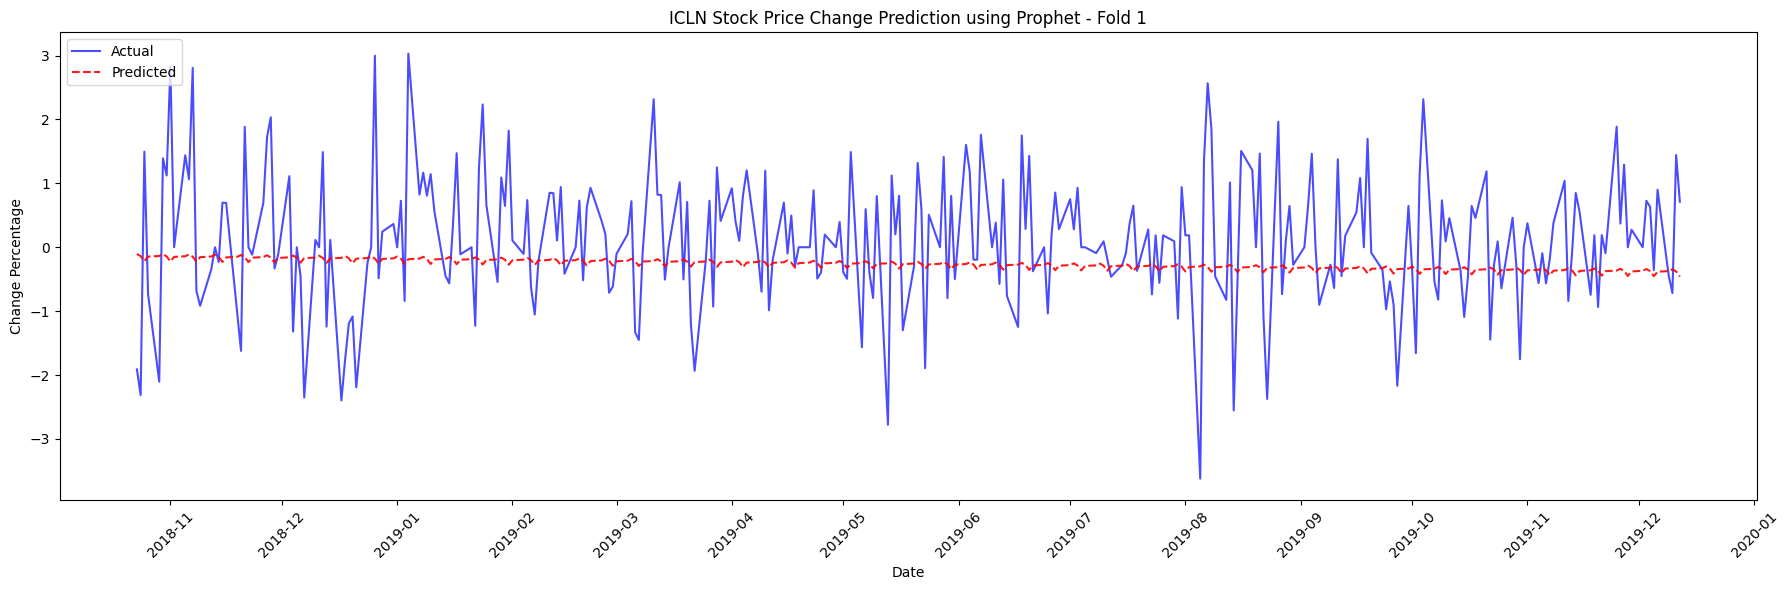

20:18:57 - cmdstanpy - INFO - Chain [1] start processing
20:18:57 - cmdstanpy - INFO - Chain [1] done processing


Fold 2 - Test Mean Absolute Error: 1.7722
Fold 2 - Test Mean Squared Error: 7.0216


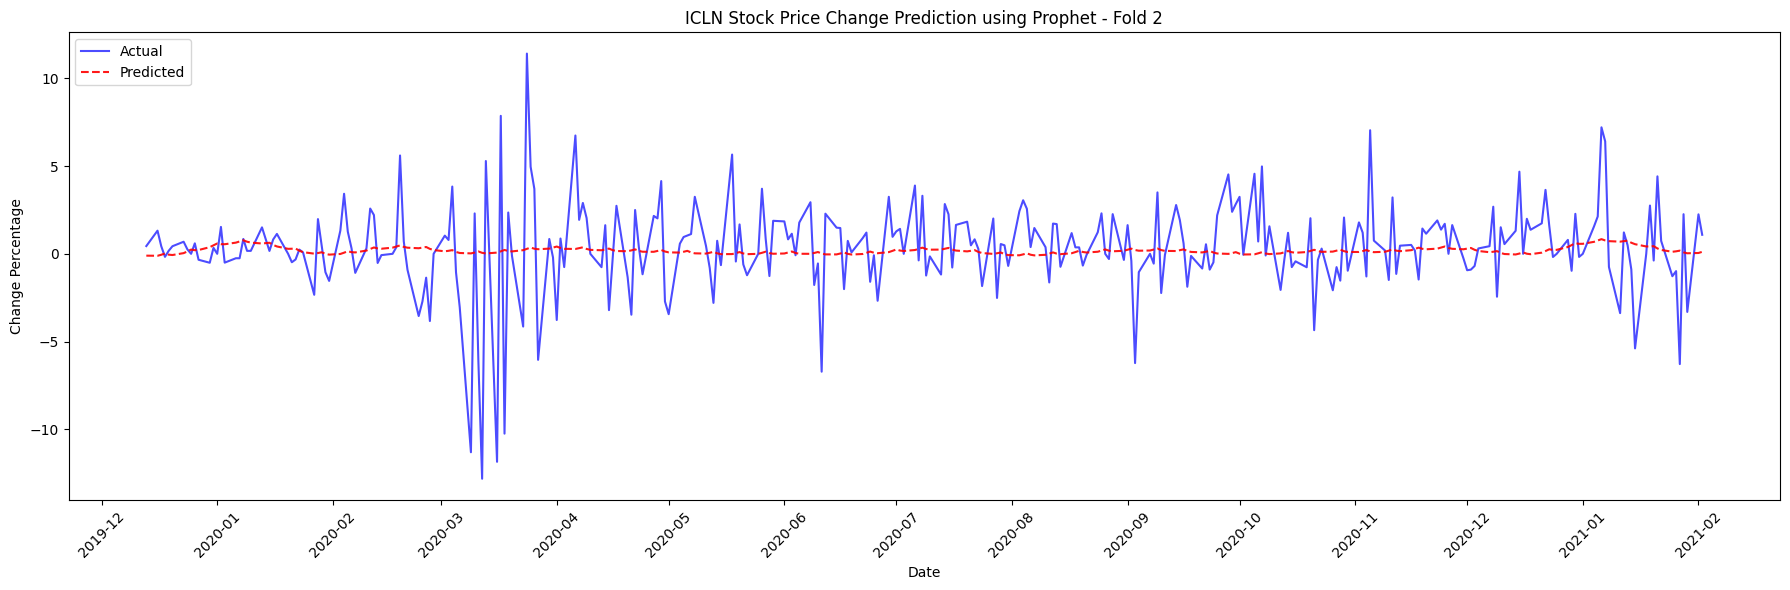

20:18:57 - cmdstanpy - INFO - Chain [1] start processing
20:18:57 - cmdstanpy - INFO - Chain [1] done processing


Fold 3 - Test Mean Absolute Error: 1.6776
Fold 3 - Test Mean Squared Error: 4.9303


20:18:57 - cmdstanpy - INFO - Chain [1] start processing
20:18:57 - cmdstanpy - INFO - Chain [1] done processing


Fold 4 - Test Mean Absolute Error: 1.4743
Fold 4 - Test Mean Squared Error: 3.6614


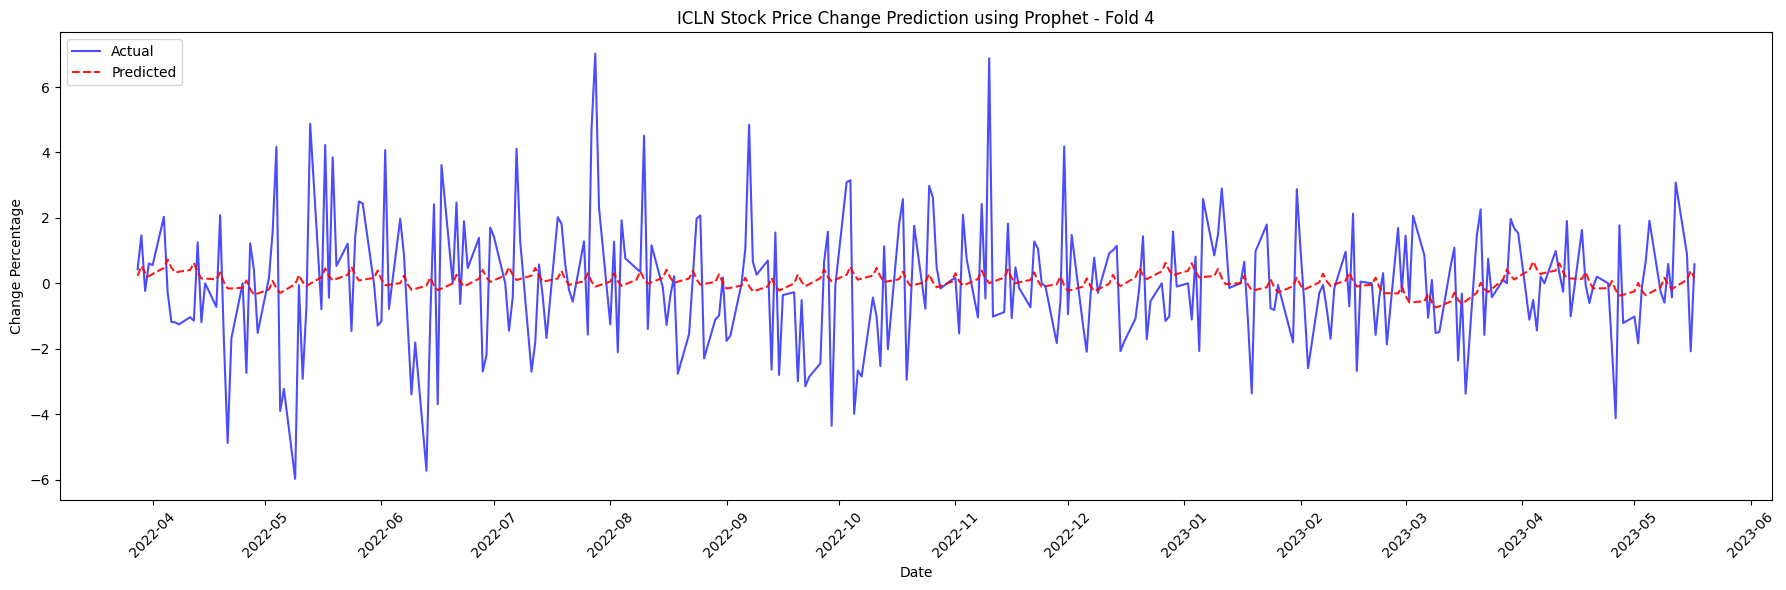

20:18:58 - cmdstanpy - INFO - Chain [1] start processing
20:18:58 - cmdstanpy - INFO - Chain [1] done processing


Fold 5 - Test Mean Absolute Error: 1.1866
Fold 5 - Test Mean Squared Error: 2.4693


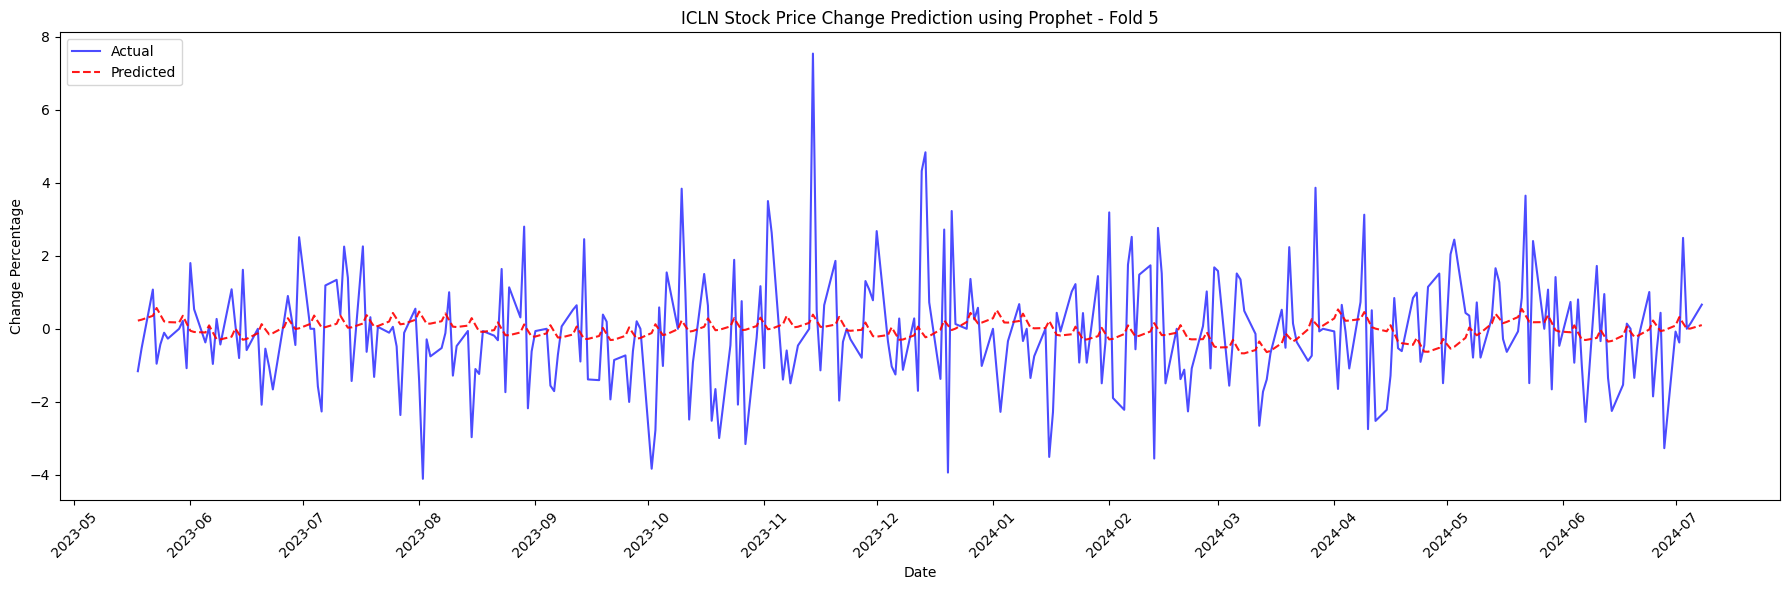

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet  

# Load and Prepare Data
df = pd.read_csv('ICLN_data_with_sentiment.csv')
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' column is in datetime format
df.sort_values('Date', inplace=True)     # Sort by date
df['Close_Percentage_Change'] = df['Close'].pct_change() * 100
df.dropna(inplace=True)

# Prepare data for Prophet
prophet_df = df.rename(columns={'Date': 'ds', 'Close_Percentage_Change': 'y'})

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

fold = 0
dates = prophet_df['ds'].values

# Loop through the splits
for train_index, test_index in tscv.split(prophet_df):
    fold += 1
    train_data = prophet_df.iloc[train_index]
    test_data = prophet_df.iloc[test_index]

    # Initialize and fit Prophet model
    model = Prophet()
    model.fit(train_data)

    # Create future dataframe
    future = test_data[['ds']]

    # Make predictions
    forecast = model.predict(future)
    test_predictions = forecast['yhat'].values
    y_test = test_data['y'].values

    # Evaluation
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    print(f'Fold {fold} - Test Mean Absolute Error: {test_mae:.4f}')
    print(f'Fold {fold} - Test Mean Squared Error: {test_mse:.4f}')

    # Plot predictions for this fold
    plt.figure(figsize=(18, 6))
    test_dates = test_data['ds']

    plt.plot(test_dates, y_test, label='Actual', color='blue', alpha=0.7)
    plt.plot(test_dates, test_predictions, label='Predicted', color='red', linestyle='--', alpha=0.9)

    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    plt.title(f'ICLN Stock Price Change Prediction using Prophet - Fold {fold}')
    plt.xlabel('Date')
    plt.ylabel('Change Percentage')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
